# Predicción del espectro de respuesta a partir de datos in situ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## EDA NGA West2

In [2]:
df = pd.read_excel('C:/Users/elias/OneDrive/Desktop/MachineLearning/FinalProjectDL/Final_Project/Updated_NGA_West2_Flatfile_RotD50EDITADO.xlsx')
df

Record Sequence Number  Hypocenter Latitude (deg)  \
0                           1                   46.61000   
1                           2                   46.62000   
2                           3                   40.40000   
3                           4                   32.90000   
4                           5                   40.30000   
...                       ...                        ...   
21293                   21536                   37.86037   
21294                   21537                   37.86037   
21295                   21538                   37.86037   
21296                   21539                   37.86037   
21297                   21540                   35.81700   

       Hypocenter Longitude (deg)  Station Latitude  Station Longitude  \
0                      -111.96000          46.58000          -112.0300   
1                      -111.97000          46.59000          -112.0400   
2                      -125.10000          40.57600          -124.2630   
3                      -115.21700          32.79400          -115.5490   
4                      -124.80000          40.57600          -124.2630   
...                           ...               ...                ...   
21293                  -122.23589          37.58230          -122.4201   
21294                  -122.23589          37.40370          -122.1760   
21295                  -122.23589          37.58640          -122.5022   
21296                  -122.23589          37.94910          -122.4085   
21297                  -120.36500          35.21263          -120.8553   

       Hypocenter Depth (km)     Earthquake Name  Magnitude Magnitude Type  \
0                      6.000  Helena, Montana-01        6.0             Mw   
1                      6.000  Helena, Montana-02        6.0              U   
2                     10.000         Humbolt Bay        5.8             Mw   
3                     16.000  Imperial Valley-01        5.0              U   
4                     10.000  Northwest Calif-01        5.5             Mw   
...                      ...                 ...        ...            ...   
21293                  8.465            51177103        3.6             Mw   
21294                  8.465            51177103        3.6             Mw   
21295                  8.465            51177103        3.6             Mw   
21296                  8.465            51177103        3.6             Mw   
21297                  8.100    Parkfield-02, CA        6.0             Mw   

       EpiD (km)  ...  T_0.5_RotD50  T_0.75_RotD50  T_1.0_RotD50  \
0        6.31000  ...      0.143020       0.092829      0.101136   
1        6.31000  ...      0.004500       0.002727      0.001501   
2       73.49000  ...      0.082295       0.056946      0.035785   
3       33.20000  ...      0.021552       0.009689      0.006027   
4       54.88000  ...      0.223093       0.091499      0.093659   
...          ...  ...           ...            ...           ...   
21293   34.87796  ...      0.001476       0.000493      0.000260   
21294   50.96330  ...      0.000350       0.000166      0.000093   
21295   38.41923  ...      0.000883       0.000366      0.000123   
21296   18.09285  ...      0.000810       0.000282      0.000159   
21297   80.53000  ...      0.030253       0.017435      0.009625   

       T_1.5_RotD50  T_2.0_RotD50  T_3.0_RotD50  T_4.0_RotD50  T_5.0_RotD50  \
0          0.059109      0.035895      0.015257      0.007987      0.004644   
1          0.001135      0.000681           NaN           NaN           NaN   
2          0.016157      0.009347      0.002960           NaN           NaN   
3          0.002115           NaN           NaN           NaN           NaN   
4          0.026785      0.013654           NaN           NaN           NaN   
...             ...           ...           ...           ...           ...   
21293      0.000114           NaN           NaN           NaN           NaN   
21294      

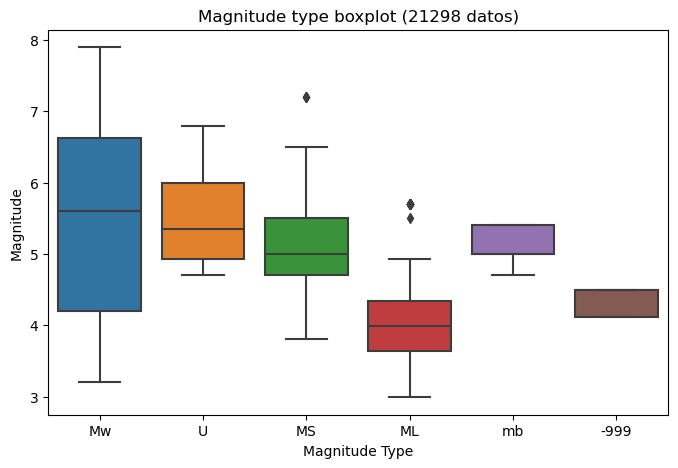

In [3]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Magnitude Type", y="Magnitude", data=df)
plt.title("Magnitude type boxplot (21298 datos)")
plt.xlabel("Magnitude Type")
plt.ylabel("Magnitude")
plt.show()

In [4]:
df = df[df['Magnitude Type'] == 'Mw']

In [5]:
df.drop(columns=['Record Sequence Number','Earthquake Name',
                'Magnitude Type','EpiD (km)','Joyner-Boore Dist. (km)',
                'RmsD (km)','Rx','Vs30 (m/s) selected for analysis',
                'Tmax', 'Lowest Usable Freq - Ave. Component (Hz)',
                'PGA (g)','PGV (cm/sec)','PGD (cm)'], inplace=True)

In [6]:
df

Hypocenter Latitude (deg)  Hypocenter Longitude (deg)  \
0                       46.61000                  -111.96000   
2                       40.40000                  -125.10000   
4                       40.30000                  -124.80000   
5                       32.76010                  -115.41620   
10                      40.28300                  -124.80000   
...                          ...                         ...   
21293                   37.86037                  -122.23589   
21294                   37.86037                  -122.23589   
21295                   37.86037                  -122.23589   
21296                   37.86037                  -122.23589   
21297                   35.81700                  -120.36500   

       Station Latitude  Station Longitude  Hypocenter Depth (km)  Magnitude  \
0              46.58000          -112.0300                  6.000       6.00   
2              40.57600          -124.2630                 10.000       5.80   
4              40.57600          -124.2630                 10.000       5.50   
5              32.79400          -115.5490                  8.800       6.95   
10             40.57600          -124.2630                 10.000       5.80   
...                 ...                ...                    ...        ...   
21293          37.58230          -122.4201                  8.465       3.60   
21294          37.40370          -122.1760                  8.465       3.60   
21295          37.58640          -122.5022                  8.465       3.60   
21296          37.94910          -122.4085                  8.465       3.60   
21297          35.21263          -120.8553                  8.100       6.00   

       Rhypo_OpenQuake  Rrup_OpenQuake  Soil_Class  T_0.01_RotD50  ...  \
0              8.71000            2.86           3       0.161934  ...   
2             74.17000           71.57           4       0.040997  ...   
4             55.78000           53.58           4       0.122486  ...   
5             15.69000            6.09           4       0.234619  ...   
10            56.85000           53.77           4       0.107289  ...   
...                ...             ...         ...            ...  ...   
21293         35.89050           35.63           2       0.005176  ...   
21294         51.66153           51.36           3       0.000505  ...   
21295         39.34073           39.13           3       0.003058  ...   
21296         19.97517           19.44           2       0.001620  ...   
21297         81.00000           78.32           3       0.010478  ...   

       T_0.5_RotD50  T_0.75_RotD50  T_1.0_RotD50  T_1.5_RotD50  T_2.0_RotD50  \
0          0.143020       0.092829      0.101136      0.059109      0.035895   
2          0.082295       0.056946      0.035785      0.016157      0.009347   
4          0.223093       0.091499      0.093659      0.026785      0.013654   
5          0.629952       0.435350      0.351286      0.197357      0.215745   
10         0.172930       0.124190      0.085661      0.040947      0.019499   
...             ...            ...           ...           ...           ...   
21293      0.001476       0.000493      0.000260      0.000114           NaN   
21294      0.000350       0.000166      0.000093      0.000043      0.000016   
21295      0.000883       0.000366      0.000123      0.000052      0.000032   
21296      0.000810       0.000282      0.000159      0.000067      0.000032   
21297      0.030253       0.017435      0.009625      0.005255      0.003526   

       T_3.0_RotD50  T_4.0_RotD50  T_5.0_RotD50  T_6.0_RotD50  T_10.0_RotD50  
0          0.015257      0.007987      0.004644      0.003037            NaN  
2          0.002960           NaN           NaN           NaN            NaN  
4               NaN           NaN           NaN           NaN            NaN  
5          0.106360      0.046965           NaN           NaN            NaN  
10              NaN           Na

In [7]:
inputs  = df.columns[0:9]
outputs = df.columns[9:31]

In [8]:
outputs

Index(['T_0.01_RotD50', 'T_0.02_RotD50', 'T_0.03_RotD50', 'T_0.04_RotD50',
       'T_0.05_RotD50', 'T_0.075_RotD50', 'T_0.1_RotD50', 'T_0.15_RotD50',
       'T_0.2_RotD50', 'T_0.25_RotD50', 'T_0.3_RotD50', 'T_0.4_RotD50',
       'T_0.5_RotD50', 'T_0.75_RotD50', 'T_1.0_RotD50', 'T_1.5_RotD50',
       'T_2.0_RotD50', 'T_3.0_RotD50', 'T_4.0_RotD50', 'T_5.0_RotD50',
       'T_6.0_RotD50', 'T_10.0_RotD50'],
      dtype='object')

In [9]:
inputs

Index(['Hypocenter Latitude (deg)', 'Hypocenter Longitude (deg)',
       'Station Latitude', 'Station Longitude', 'Hypocenter Depth (km)',
       'Magnitude', 'Rhypo_OpenQuake', 'Rrup_OpenQuake', 'Soil_Class'],
      dtype='object')

          Magnitude  Hypocenter Depth (km)  Rhypo_OpenQuake  Rrup_OpenQuake
count  12899.000000           12899.000000     12899.000000    12899.000000
mean       5.491133               9.535059       130.250791      119.096239
std        1.300257               3.882544       128.989256      113.610083
min        3.200000               0.020000         2.060000        0.050000
25%        4.200000               6.973000        49.350000       43.160000
50%        5.600000               9.000000        94.268230       86.320000
75%        6.630000              12.000000       176.580350      165.395000
max        7.900000              41.000000      1754.710000     1532.660000


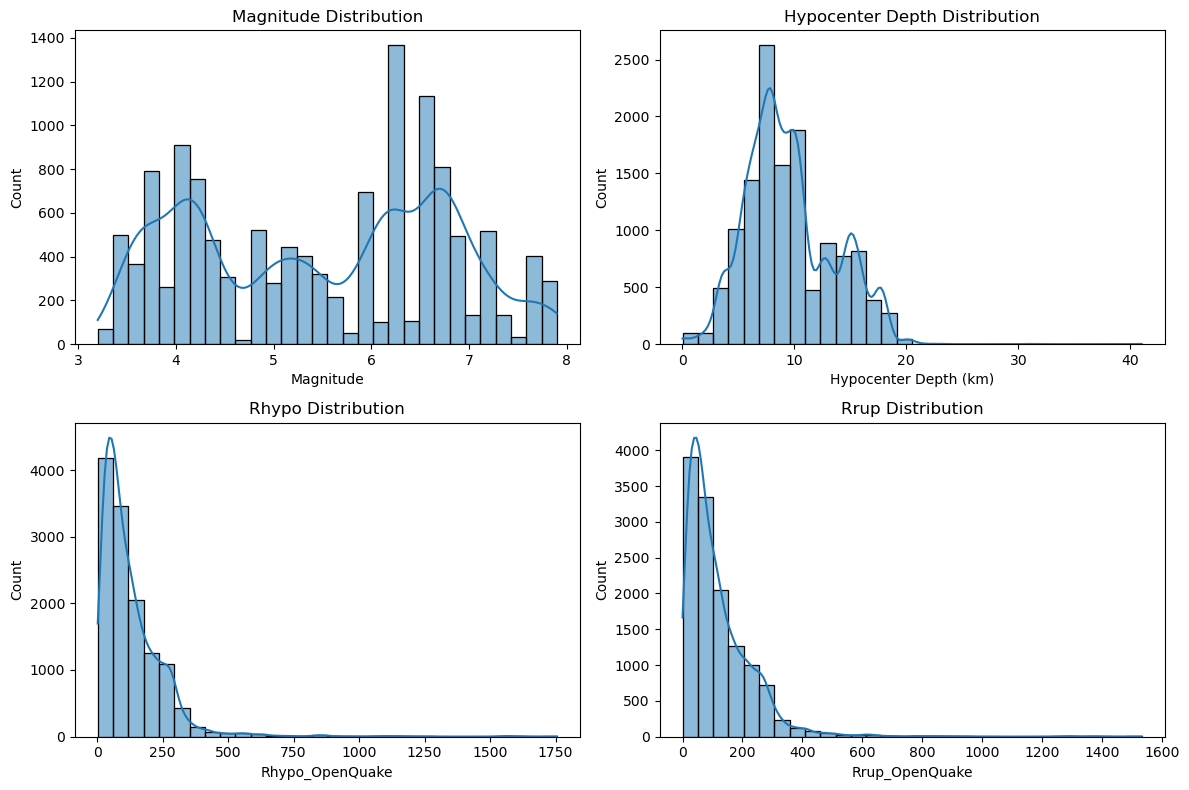

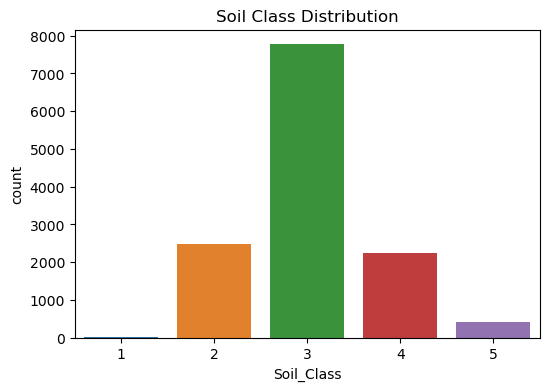

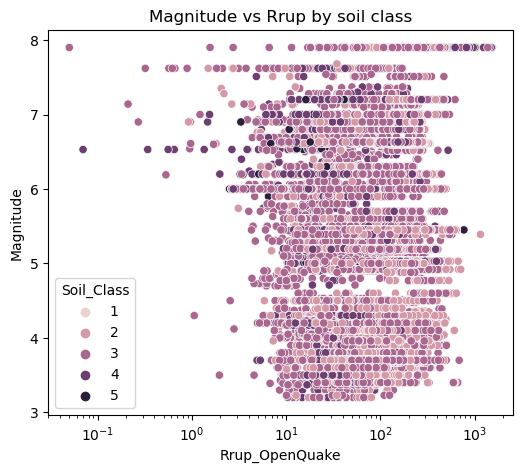

In [10]:
# Asumiendo que tu DataFrame se llama df
# 1. Descriptivos
print(df[['Magnitude', 'Hypocenter Depth (km)', 'Rhypo_OpenQuake', 'Rrup_OpenQuake']].describe())

# 2. Histogramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['Magnitude'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Magnitude Distribution")

sns.histplot(df['Hypocenter Depth (km)'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Hypocenter Depth Distribution")

sns.histplot(df['Rhypo_OpenQuake'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Rhypo Distribution")

sns.histplot(df['Rrup_OpenQuake'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Rrup Distribution")


plt.tight_layout()
plt.show()

# 3. Soil_Class
plt.figure(figsize=(6,4))
sns.countplot(x="Soil_Class", data=df)
plt.title("Soil Class Distribution")
plt.show()

# 4. Relaciones bivariadas
plt.figure(figsize=(6,5))
sns.scatterplot(x="Rrup_OpenQuake", y="Magnitude", hue="Soil_Class", data=df)
plt.xscale("log")
plt.title("Magnitude vs Rrup by soil class")
plt.show()


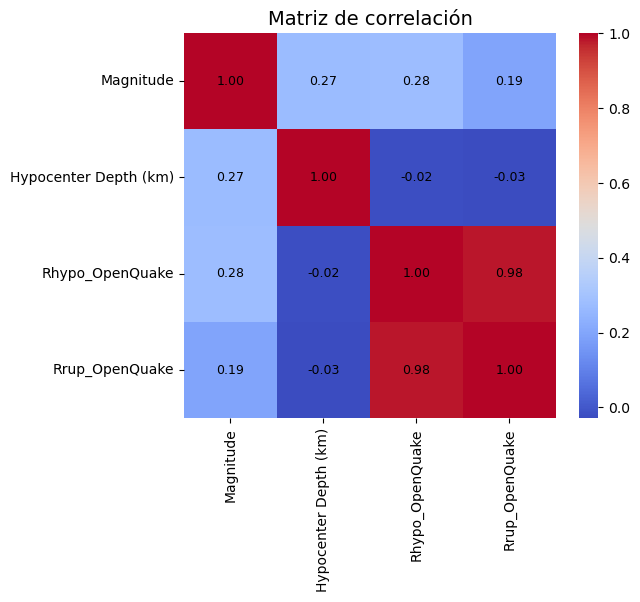

In [11]:
corr = df[['Magnitude','Hypocenter Depth (km)','Rhypo_OpenQuake','Rrup_OpenQuake']].corr()

plt.figure(figsize=(6,5))
ax = sns.heatmap(corr, annot=False, cmap="coolwarm")

# Anotar manualmente
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j+0.5, i+0.5, f"{corr.iloc[i,j]:.2f}", 
                ha='center', va='center', color='black', fontsize=9)

plt.title("Matriz de correlación", fontsize=14)
plt.show()



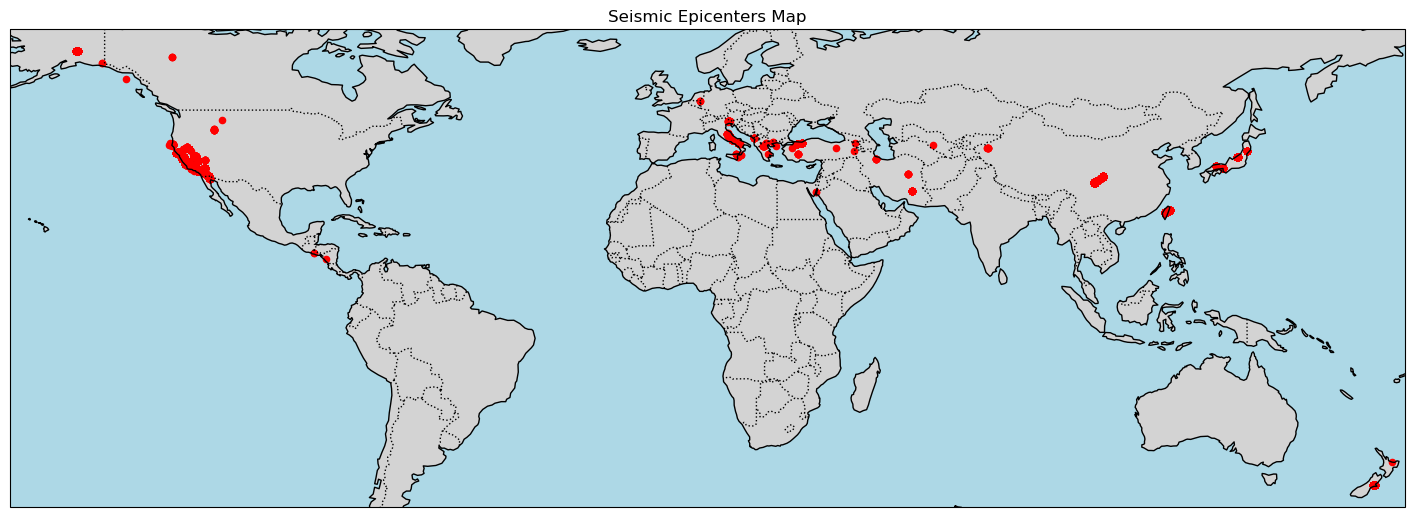

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-85, -65, -5, 15])  # límites en grados (ej: norte de Suramérica)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

plt.scatter(df["Hypocenter Longitude (deg)"], df["Hypocenter Latitude (deg)"], 
            c="red", s=20, transform=ccrs.PlateCarree())

plt.title("Seismic Epicenters Map")
plt.show()


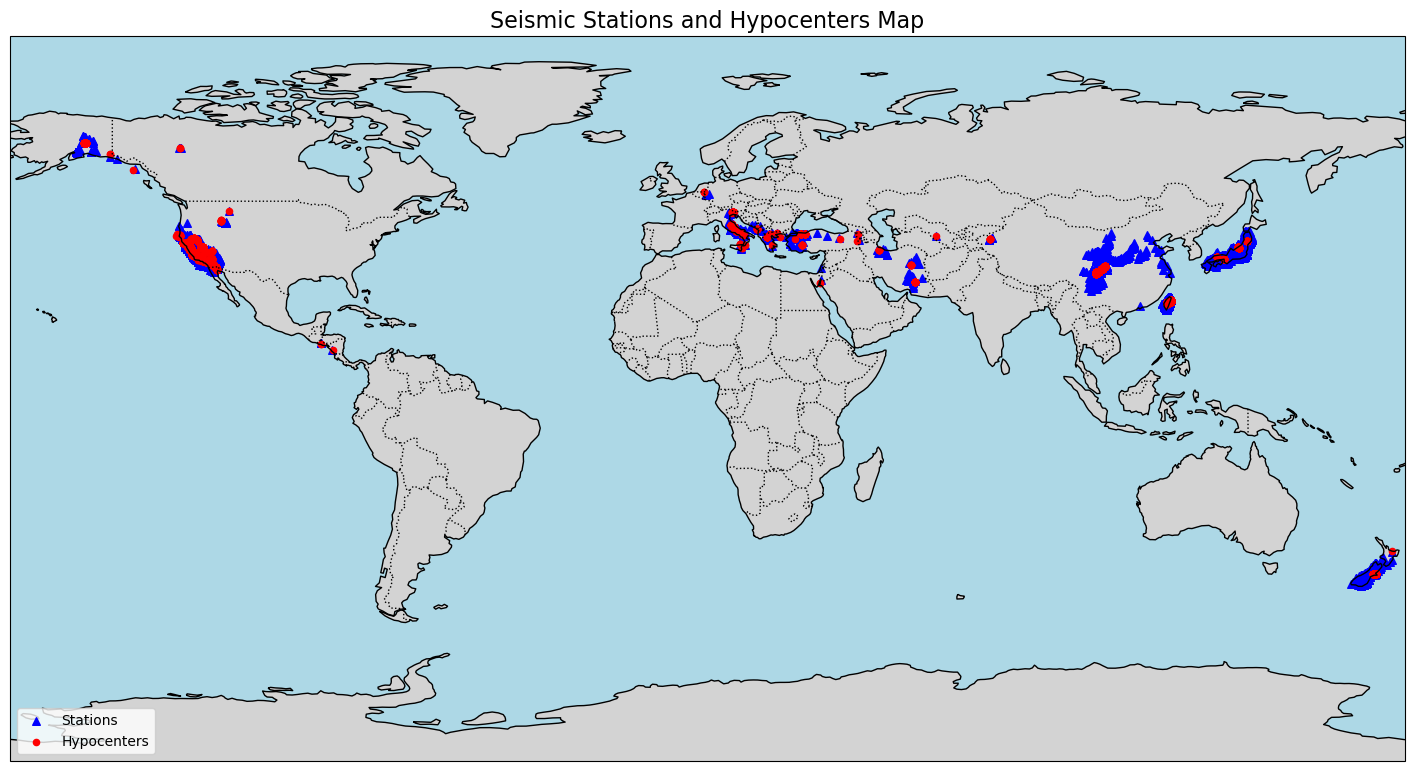

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Límites opcionales: norte de Suramérica
# ax.set_extent([-85, -65, -5, 15])  

# Agregar elementos del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Estaciones (ej. en azul)
plt.scatter(df["Station Longitude"], df["Station Latitude"], 
            c="blue", s=30, marker="^", 
            label="Stations", transform=ccrs.PlateCarree())

# Hipocentros (ej. en rojo)
plt.scatter(df["Hypocenter Longitude (deg)"], df["Hypocenter Latitude (deg)"], 
            c="red", s=20, marker="o", 
            label="Hypocenters", transform=ccrs.PlateCarree())

# Título y leyenda
plt.title("Seismic Stations and Hypocenters Map", fontsize=16)
plt.legend(loc="lower left")

plt.show()


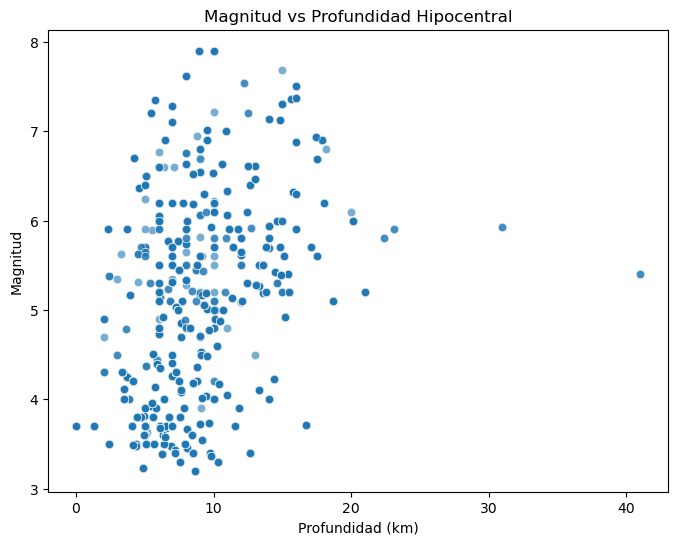

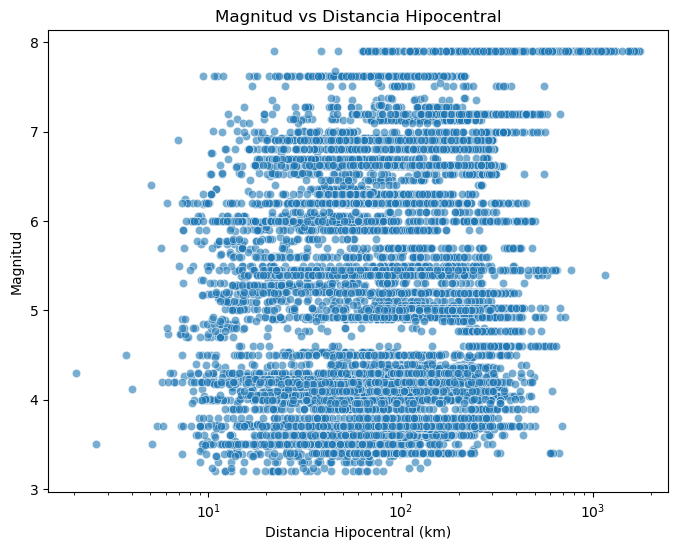

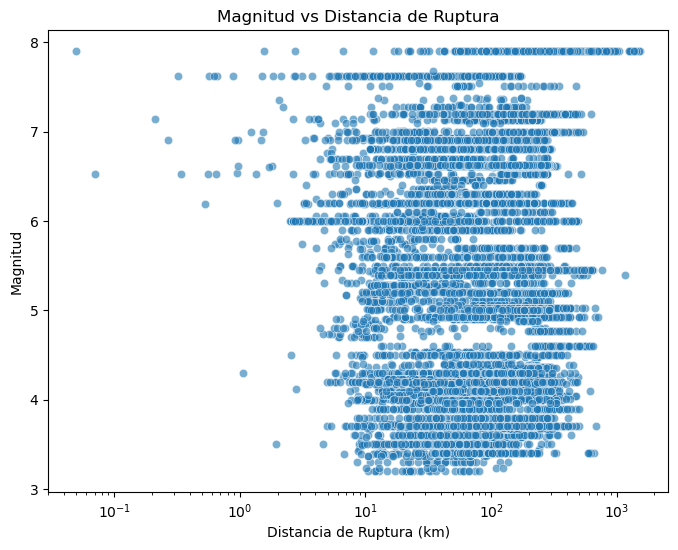

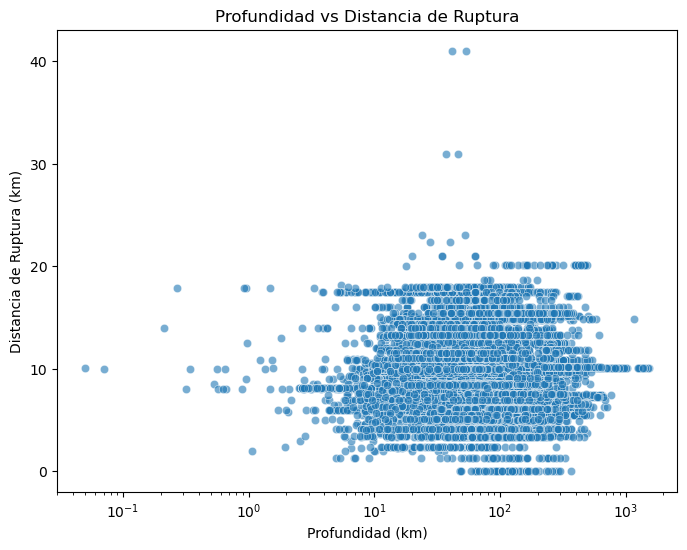

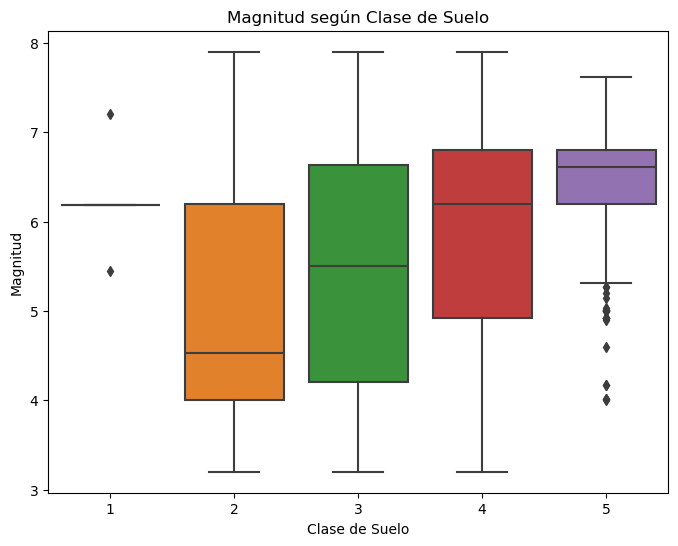

In [14]:
# 1. Magnitud vs Profundidad
plt.figure(figsize=(8,6))
sns.scatterplot(x="Hypocenter Depth (km)", y="Magnitude", data=df, alpha=0.6)
plt.title("Magnitud vs Profundidad Hipocentral")
plt.xlabel("Profundidad (km)")
plt.ylabel("Magnitud")
plt.show()

# 2. Magnitud vs Distancia hipocentral
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rhypo_OpenQuake", y="Magnitude", data=df, alpha=0.6)
plt.title("Magnitud vs Distancia Hipocentral")
plt.xlabel("Distancia Hipocentral (km)")
plt.ylabel("Magnitud")
plt.xscale("log")
plt.show()

# 3. Magnitud vs Distancia de ruptura
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rrup_OpenQuake", y="Magnitude", data=df, alpha=0.6)
plt.title("Magnitud vs Distancia de Ruptura")
plt.xlabel("Distancia de Ruptura (km)")
plt.ylabel("Magnitud")
plt.xscale("log")
plt.show()

# 4. Profundidad vs Distancia de ruptura
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rrup_OpenQuake", y="Hypocenter Depth (km)", data=df, alpha=0.6)
plt.title("Profundidad vs Distancia de Ruptura")
plt.xscale("log")
plt.xlabel("Profundidad (km)")
plt.ylabel("Distancia de Ruptura (km)")
plt.show()

# 5. Magnitud vs Clase de suelo
plt.figure(figsize=(8,6))
sns.boxplot(x="Soil_Class", y="Magnitude", data=df)
plt.title("Magnitud según Clase de Suelo")
plt.xlabel("Clase de Suelo")
plt.ylabel("Magnitud")
plt.show()



### Relaciones con la variable de respuesta

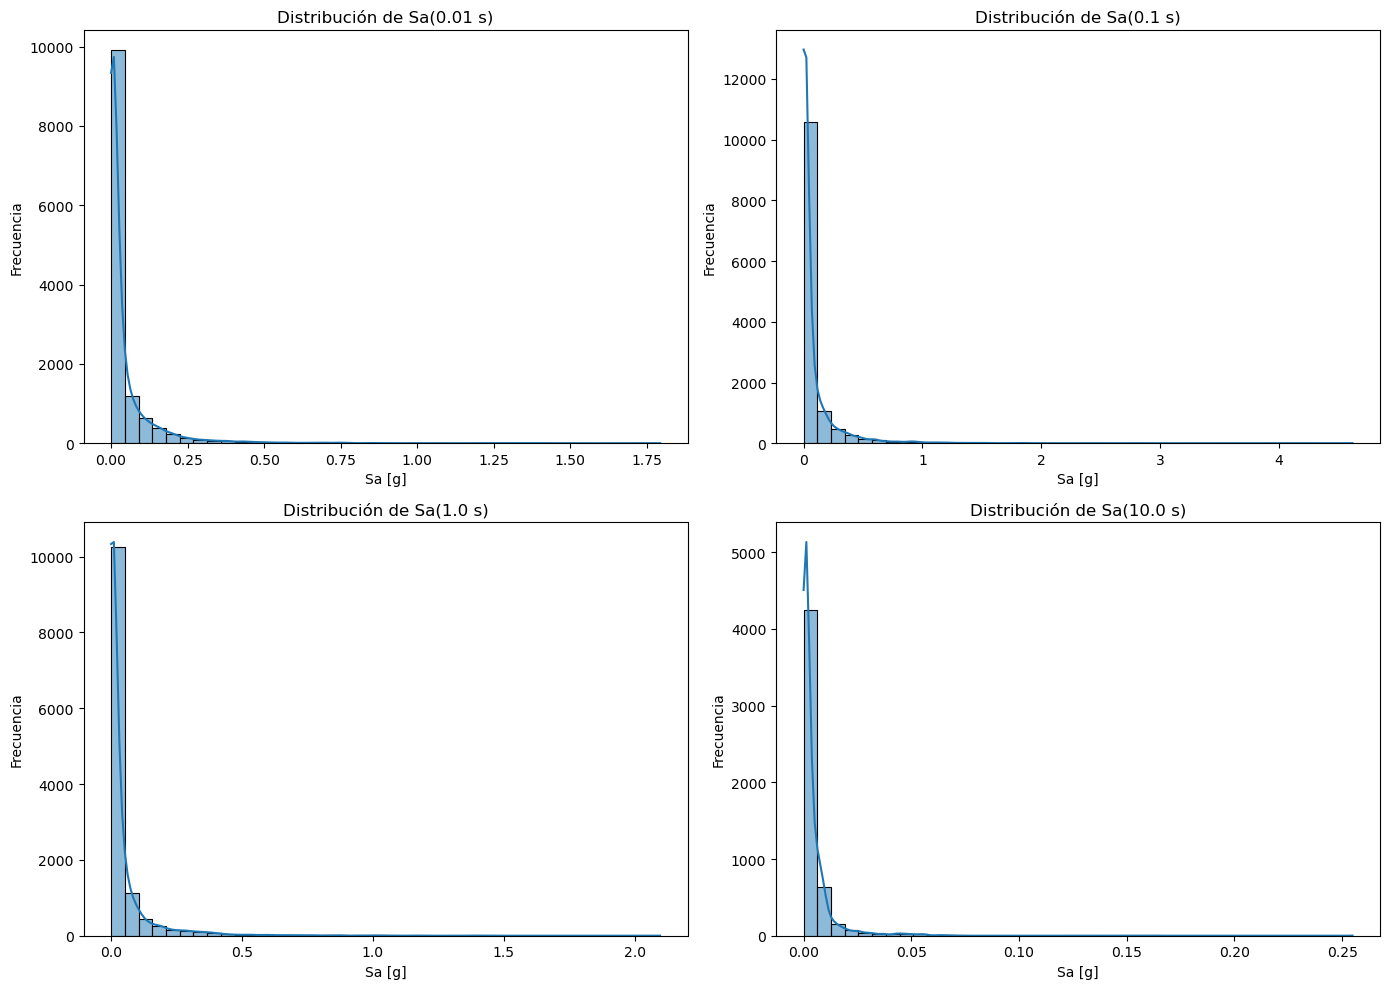

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

periodos_ref = ["T_0.01_RotD50", "T_0.1_RotD50", "T_1.0_RotD50", "T_10.0_RotD50"]

# --- 1. Distribución de Sa(T) ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.histplot(df[col], bins=40, kde=True, ax=ax)
    ax.set_title(f"Distribución de Sa({col.split('_')[1]} s)")
    ax.set_xlabel("Sa [g]")
    ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()




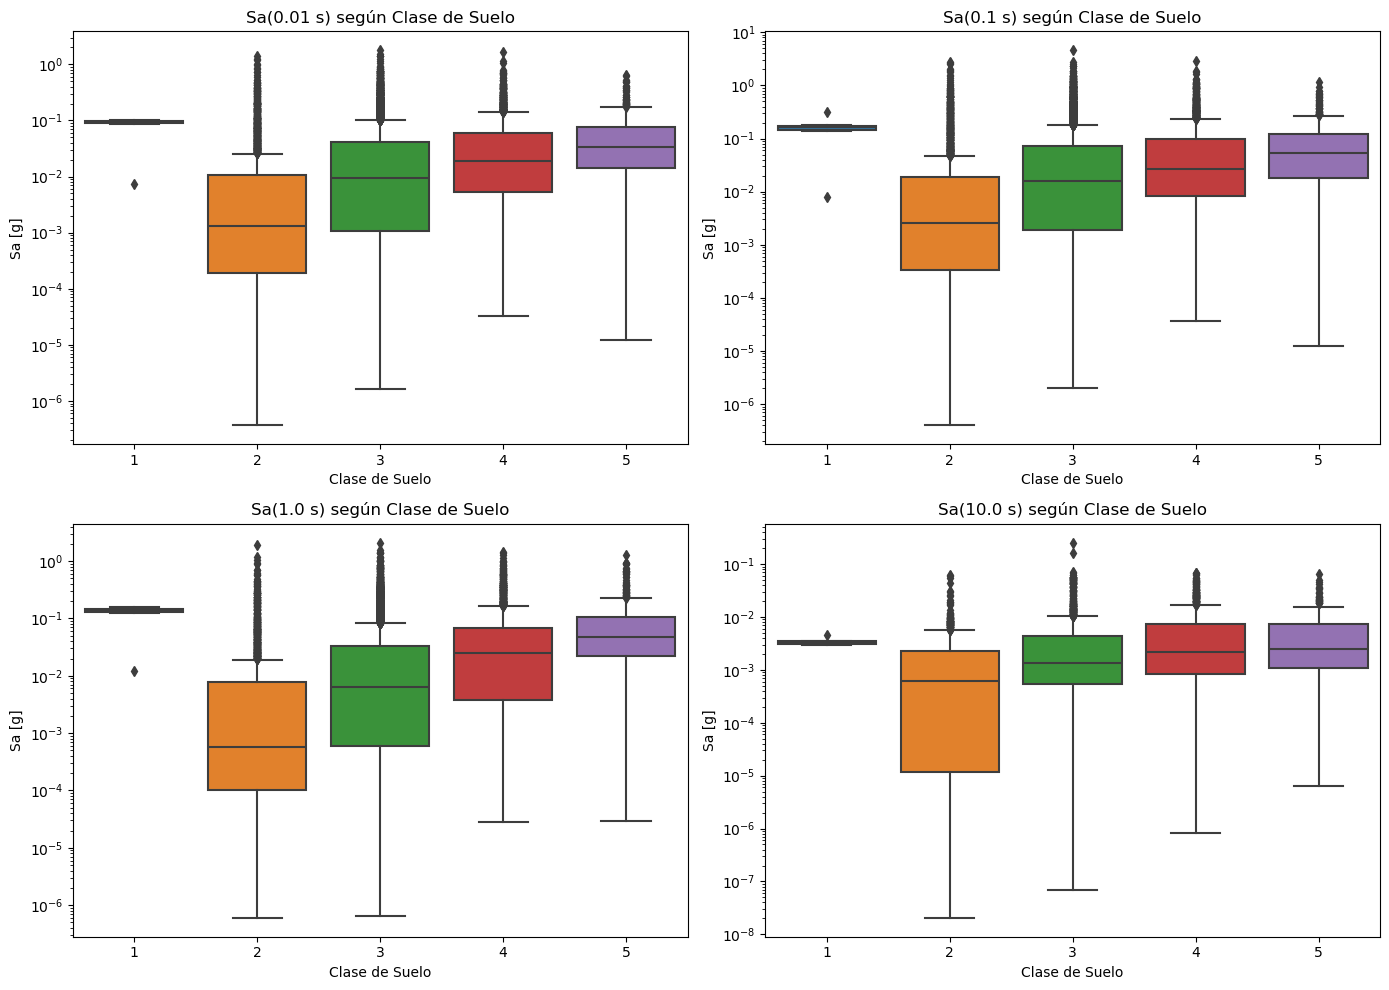

In [16]:
# --- 2. Boxplots por clase de suelo ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.boxplot(x="Soil_Class", y=col, data=df, ax=ax)
    ax.set_yscale("log")
    ax.set_title(f"Sa({col.split('_')[1]} s) según Clase de Suelo")
    ax.set_xlabel("Clase de Suelo")
    ax.set_ylabel("Sa [g]")
plt.tight_layout()
plt.show()

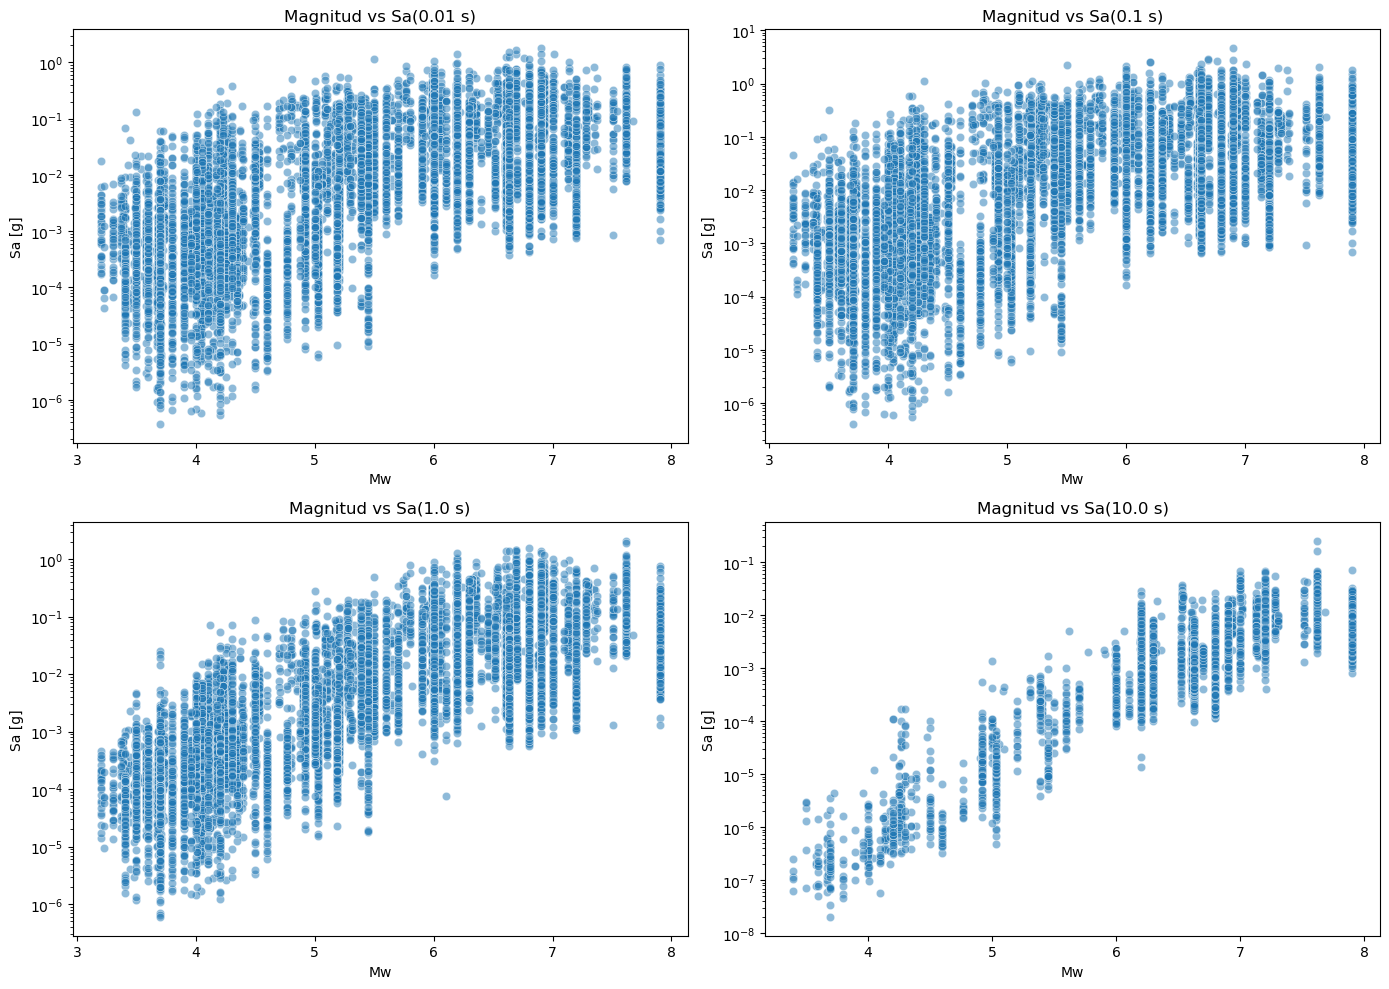

In [17]:
# --- 3. Sa(T) vs Magnitud ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.scatterplot(x="Magnitude", y=col, data=df, alpha=0.5, ax=ax)
    ax.set_yscale("log")
    ax.set_title(f"Magnitud vs Sa({col.split('_')[1]} s)")
    ax.set_xlabel("Mw")
    ax.set_ylabel("Sa [g]")
plt.tight_layout()
plt.show()

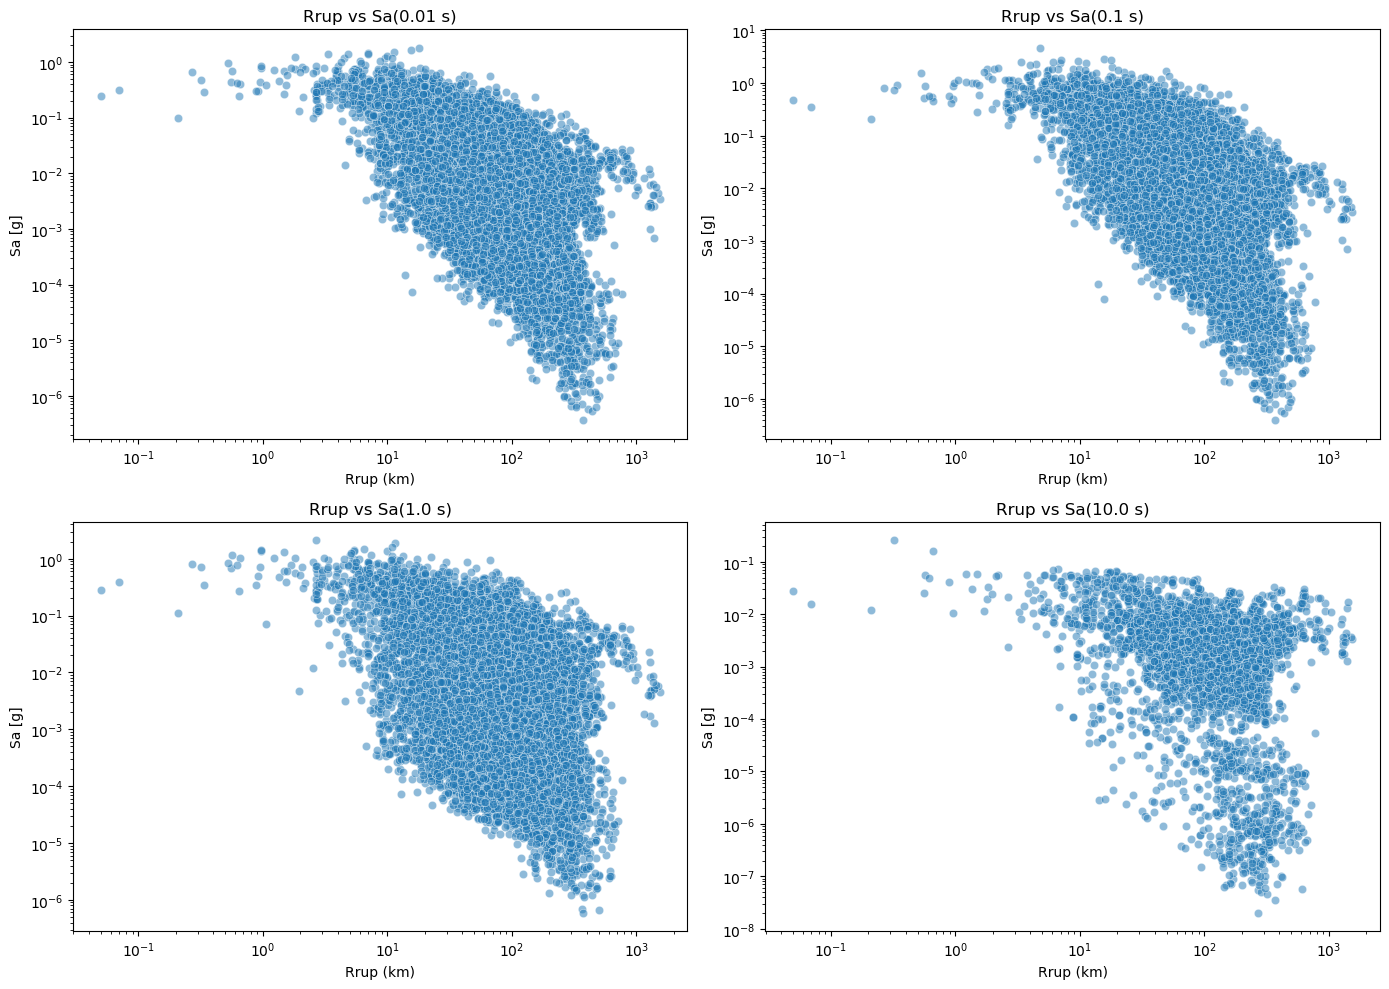

In [18]:
# --- 4. Sa(T) vs Distancia (Rrup) ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.scatterplot(x="Rrup_OpenQuake", y=col, data=df, alpha=0.5, ax=ax)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(f"Rrup vs Sa({col.split('_')[1]} s)")
    ax.set_xlabel("Rrup (km)")
    ax.set_ylabel("Sa [g]")
plt.tight_layout()
plt.show()

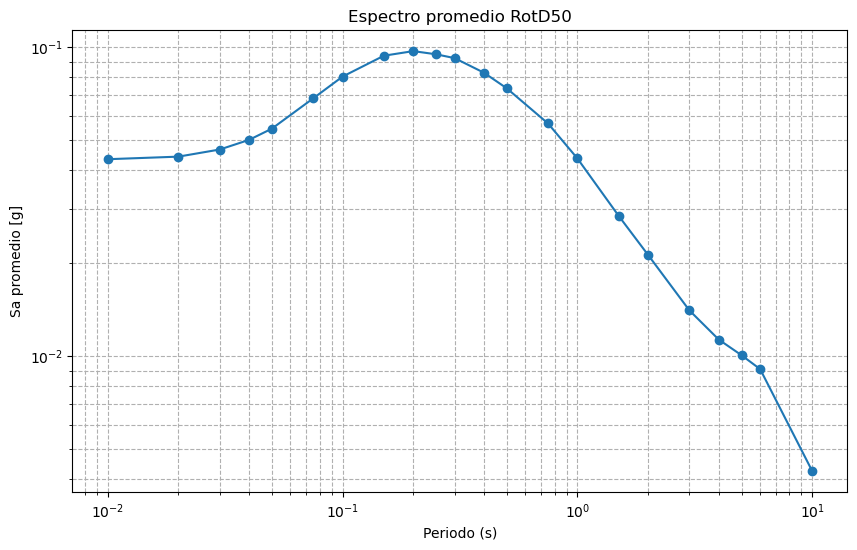

In [19]:
# --- 5. Espectro promedio ---
cols_spectra = df.filter(like="RotD50").columns
T = [float(c.split("_")[1]) for c in cols_spectra]
Sa_mean = df[cols_spectra].mean()

plt.figure(figsize=(10,6))
plt.plot(T, Sa_mean, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Periodo (s)")
plt.ylabel("Sa promedio [g]")
plt.title("Espectro promedio RotD50")
plt.grid(True, which="both", ls="--")
plt.show()


## EDA Colombia

In [20]:
df_Col = pd.read_excel('C:/Users/elias/OneDrive/Desktop/MachineLearning/FinalProjectDL/Final_Project/CopiaDataBaseSGC.xlsx')
df_Col

Record Sequence Number               EQID  \
0                         76  CO_19940913100134   
1                         79  CO_19961104172500   
2                         89  CO_19961104172500   
3                         93  CO_20070424085334   
4                         95  CO_20080524192044   
...                      ...                ...   
8806                    6438  CO_20190616161836   
8807                    7490  CO_20180108125827   
8808                    8434  CO_20190616161836   
8809                    1340  CO_20150221222646   
8810                    1530  CO_20050421033924   

      Epicenter Latitude (deg; positive N)  \
0                                    7.105   
1                                    7.364   
2                                    7.364   
3                                    5.621   
4                                    4.374   
...                                    ...   
8806                                 6.820   
8807                                 6.790   
8808                                 6.820   
8809                                 4.670   
8810                                 4.985   

      Epicenter Longitude (deg; positive E)  Hypocenter Depth (km)  Magnitude  \
0                                   -76.665                   14.0     6.0202   
1                                   -77.380                   14.0     6.2562   
2                                   -77.380                   14.0     6.2562   
3                                   -75.895                   50.6     5.1307   
4                                   -73.708                   14.7     5.8671   
...                                     ...                    ...        ...   
8806                                -73.150                  143.0     4.6000   
8807                                -72.980                  153.4     4.9912   
8808                                -73.150                  143.0     4.6000   
8809                                -76.180                   95.0     5.1699   
8810                                -76.263                  101.9     5.2333   

     Magnitude type  \
0                Mw   
1                Mw   
2                Mw   
3                Mw   
4                Mw   
...             ...   
8806             Mw   
8807             Mw   
8808             Mw   
8809             Mw   
8810             Mw   

     Tectonic environment (Crustal; Inslab; Interface; Stable; Deep; Volcanic; Oceanic_crust)  \
0                                               Crustal                                         
1                                               Crustal                                         
2                                               Crustal                                         
3                                               Crustal                                         
4                                               Crustal                                         
...                                                 ...                                         
8806                                               Deep                                         
8807                                               Deep                                         
8808                                               Deep                                         
8809                                             Inslab                                         
8810                                             Inslab                                         

      Nodal Plane 1 Strike (deg)  Nodal Plane 1 Dip (deg)  ...  T_2.5_RotD50  \
0                              4                       64  ...           NaN   
1                            188                       43  ...           NaN   
2                            188                       43  ...           NaN   
3                            154                       23  ...           NaN   
4                        

In [21]:
columnas_a_eliminar = [
    "Record Sequence Number", "Station ID", "Station Code", "Magnitude type", "EQID", "Valor_T1.5",
    "Tmax", 
    #"Epicenter Latitude (deg; positive N)", "Epicenter Longitude (deg; positive E)",
    #"Station Latitude (deg positive N)", "Station Longitude (deg positive E)",
    "Topografía", "Geología",
    "Nodal Plane 1 Rake Angle (deg)", "Nodal Plane 2 Rake Angle (deg)",
    "Nodal Plane 2 Dip (deg)", "Nodal Plane 2 Strike (deg)",
    "Rx_OpenQuake", "Ry0_OpenQuake", "Rjb_OpenQuake",
    "Repi_OpenQuake",
    # "Rhypo_OpenQuake",
    "Station Elevation (m)",
    #"Soil_Class",
    "Nodal Plane 1 Strike (deg)", "Nodal Plane 1 Dip (deg)",
    "Fault Plane (1; 2; X)", "Style-of-Faulting (S; R; N; U)",
    "Tn",
    'Record Sequence Number','EQID','Magnitude type',
    'Tectonic environment (Crustal; Inslab; Interface; Stable; Deep; Volcanic; Oceanic_crust)'
]


In [22]:
df_Col = df_Col[df_Col['Tectonic environment (Crustal; Inslab; Interface; Stable; Deep; Volcanic; Oceanic_crust)']=='Crustal']

In [23]:
df_Col.drop(columns=columnas_a_eliminar, inplace=True)

In [24]:
df_Col

Epicenter Latitude (deg; positive N)  \
0                                    7.105   
1                                    7.364   
2                                    7.364   
3                                    5.621   
4                                    4.374   
...                                    ...   
8798                                 3.440   
8799                                 3.430   
8800                                 3.410   
8801                                 7.270   
8802                                13.160   

      Epicenter Longitude (deg; positive E)  Hypocenter Depth (km)  Magnitude  \
0                                   -76.665                   14.0     6.0202   
1                                   -77.380                   14.0     6.2562   
2                                   -77.380                   14.0     6.2562   
3                                   -75.895                   50.6     5.1307   
4                                   -73.708                   14.7     5.8671   
...                                     ...                    ...        ...   
8798                                -74.190                   10.0     4.1000   
8799                                -74.200                   18.0     4.0000   
8800                                -74.170                   15.0     4.3000   
8801                                -78.640                    4.0     5.1000   
8802                                -81.050                   10.0     5.6321   

      Station Latitude (deg positive N)  Station Longitude (deg positive E)  \
0                                5.6630                            -75.8970   
1                                5.6630                            -75.8970   
2                                5.2614                            -75.8125   
3                                5.2614                            -75.8125   
4                                5.2614                            -75.8125   
...                                 ...                                 ...   
8798                             1.1890                            -77.3220   
8799                             1.1890                            -77.3220   
8800                             1.2097                            -77.2563   
8801                             1.2097                            -77.2563   
8802                             3.3721                            -76.5300   

      Soil_Class  Rrup_OpenQuake  Rhypo_OpenQuake  T_0.01_RotD50  ...  \
0              1      174.684394       181.353681       4.847060  ...   
1              1      244.405678       254.752031       1.814338  ...   
2              2      284.525886       295.168858       1.609079  ...   
3              2       65.201764        67.842661     111.286998  ...   
4              2      247.402211       254.069428       0.832051  ...   
...          ...             ...              ...            ...  ...   
8798           5      428.091130       428.905798       0.003828  ...   
8799           5      426.956629       427.631871       0.005081  ...   
8800           5      420.098899       421.640421       0.008593  ...   
8801           5      689.662530       691.759807       0.014393  ...   
8802           5     1188.735771      1196.423818       0.136376  ...   

      T_2.5_RotD50  T_3.0_RotD50  T_4.0_RotD50  T_5.0_RotD50  T_6.0_RotD50  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...           ...           ...           ...   
8798      0.001570      0.001066      0.000630      0.000329      0.000232   
8799      0.001319      0.0008

         Magnitude  Hypocenter Depth (km)  Rhypo_OpenQuake  Rrup_OpenQuake
count  4625.000000            4625.000000      4625.000000     4625.000000
mean      4.888967              14.855676       603.941994      600.933626
std       0.538996              11.010251       391.493761      390.569914
min       3.800000               1.000000        15.963300       12.535892
25%       4.410000              10.000000       272.109203      269.646771
50%       4.861200              10.000000       521.087881      519.074539
75%       5.106300              17.000000       858.798572      856.204208
max       6.994800              58.700000      1729.619610     1719.484836


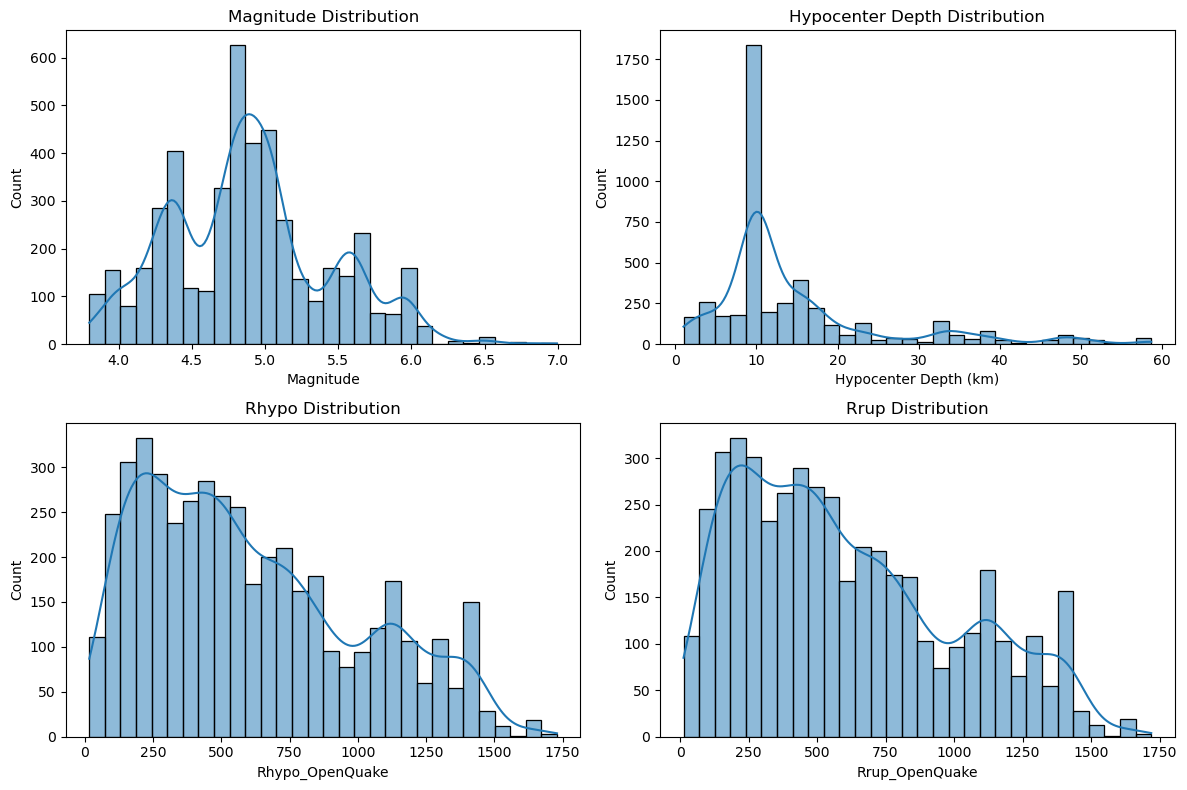

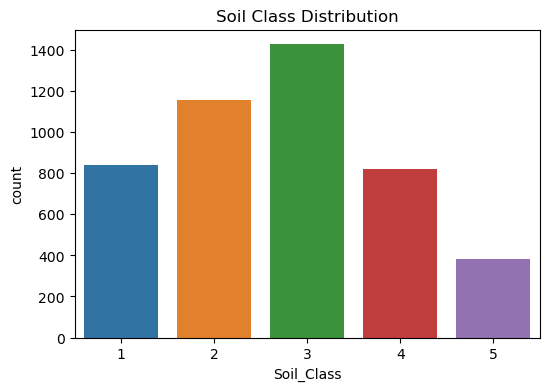

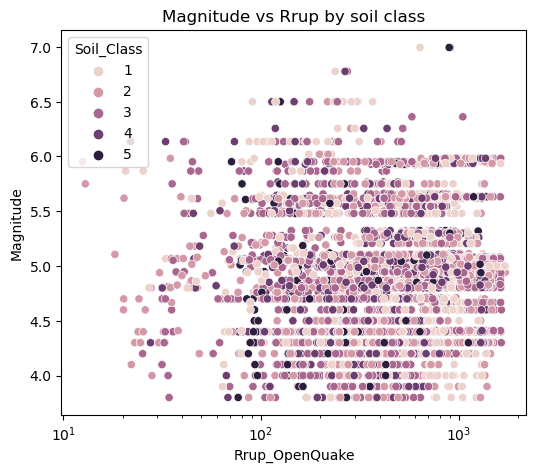

In [25]:
# 1. Descriptivos
print(df_Col[['Magnitude', 'Hypocenter Depth (km)', 'Rhypo_OpenQuake', 'Rrup_OpenQuake']].describe())

# 2. Histogramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df_Col['Magnitude'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Magnitude Distribution")

sns.histplot(df_Col['Hypocenter Depth (km)'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Hypocenter Depth Distribution")

sns.histplot(df_Col['Rhypo_OpenQuake'], bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Rhypo Distribution")

sns.histplot(df_Col['Rrup_OpenQuake'], bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Rrup Distribution")


plt.tight_layout()
plt.show()

# 3. Soil_Class
plt.figure(figsize=(6,4))
sns.countplot(x="Soil_Class", data=df_Col)
plt.title("Soil Class Distribution")
plt.show()

# 4. Relaciones bivariadas
plt.figure(figsize=(6,5))
sns.scatterplot(x="Rrup_OpenQuake", y="Magnitude", hue="Soil_Class", data=df_Col)
plt.xscale("log")
plt.title("Magnitude vs Rrup by soil class")
plt.show()

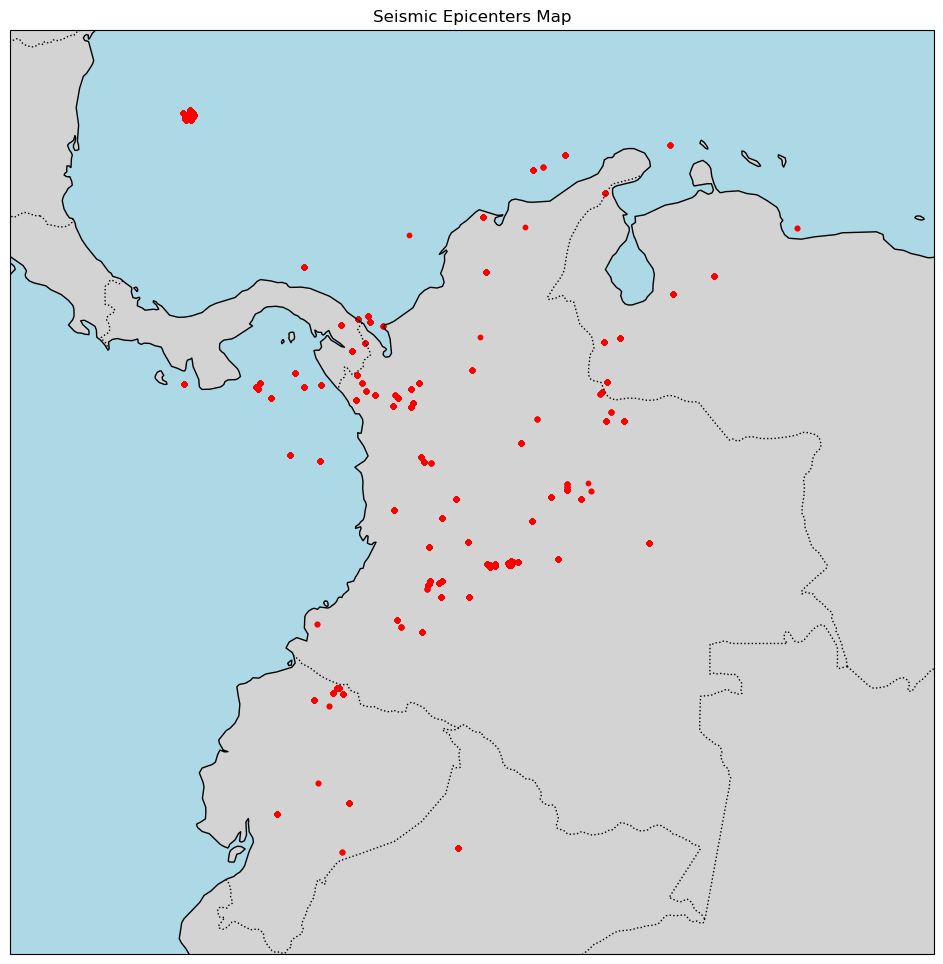

In [26]:
plt.figure(figsize=(20,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-85, -65, -5, 15])  # límites en grados (ej: norte de Suramérica)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

plt.scatter(df_Col["Epicenter Longitude (deg; positive E)"], df_Col["Epicenter Latitude (deg; positive N)"], 
            c="red", s=10, transform=ccrs.PlateCarree())

plt.title("Seismic Epicenters Map")
plt.show()

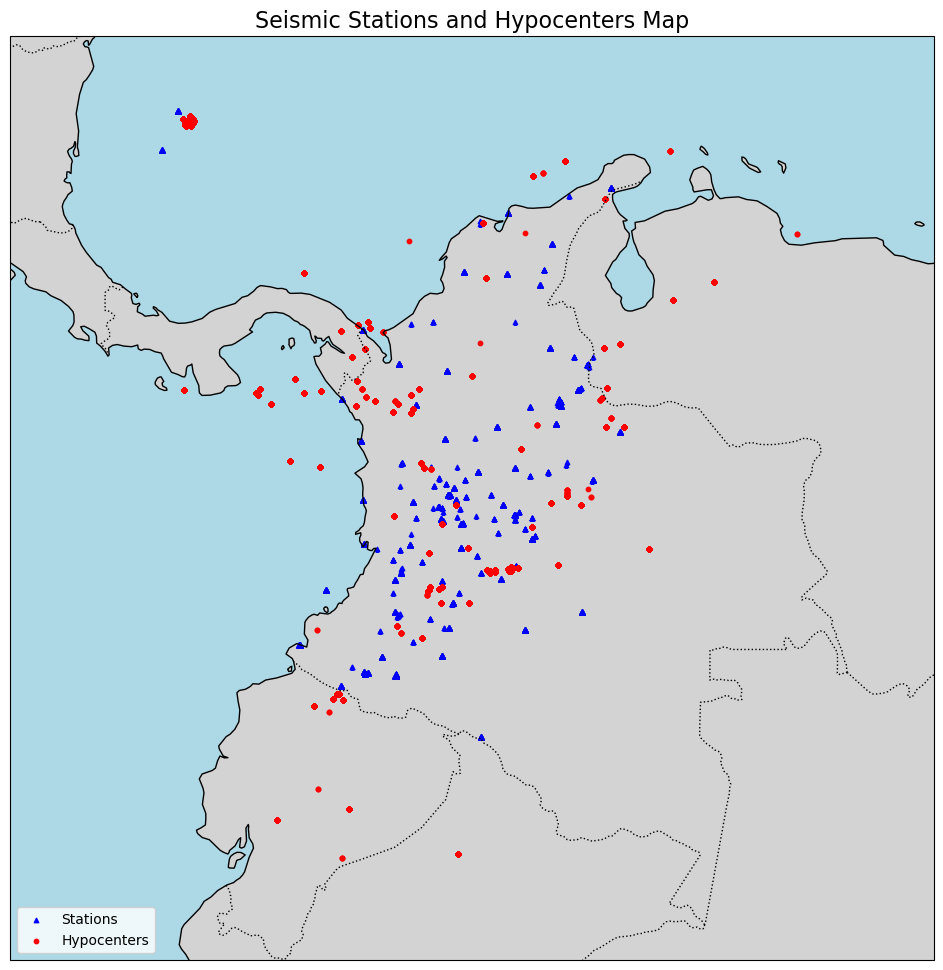

In [27]:
plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Límites opcionales: norte de Suramérica
ax.set_extent([-85, -65, -5, 15])  

# Agregar elementos del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Estaciones (ej. en azul)
plt.scatter(df_Col["Station Longitude (deg positive E)"], df_Col["Station Latitude (deg positive N)"], 
            c="blue", s=10, marker="^", 
            label="Stations", transform=ccrs.PlateCarree())

# Hipocentros (ej. en rojo)
plt.scatter(df_Col["Epicenter Longitude (deg; positive E)"], df_Col["Epicenter Latitude (deg; positive N)"], 
            c="red", s=10, marker="o", 
            label="Hypocenters", transform=ccrs.PlateCarree())

# Título y leyenda
plt.title("Seismic Stations and Hypocenters Map", fontsize=16)
plt.legend(loc="lower left")

plt.show()


In [28]:
df_Col = df_Col[df_Col['T_0.01_RotD50']>=1e-4]

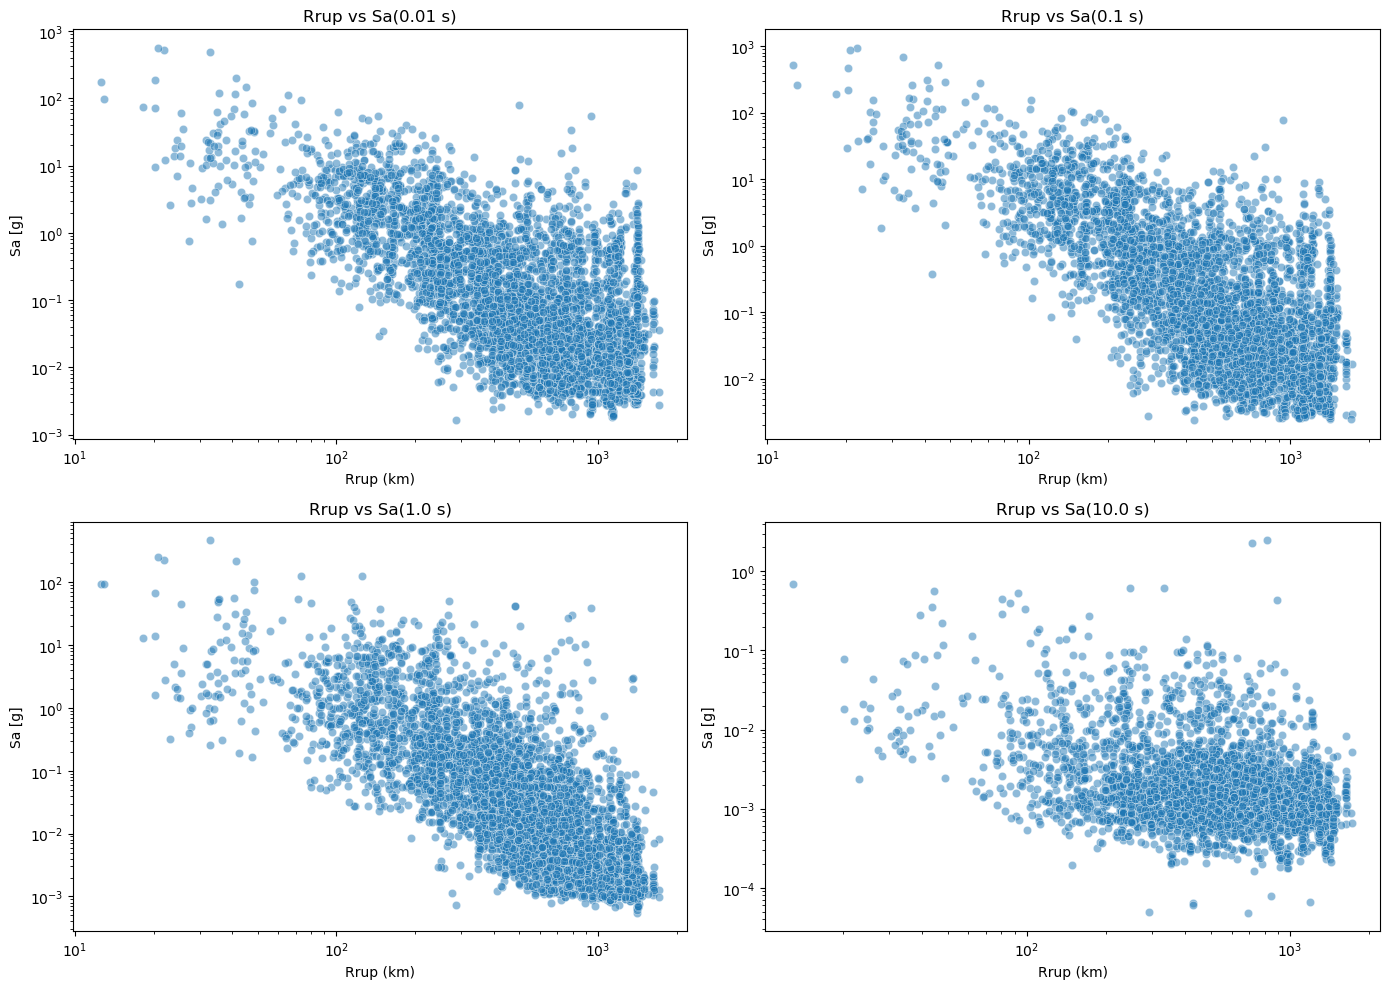

In [29]:
# --- 4. Sa(T) vs Distancia (Rrup) ---
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for ax, col in zip(axes.flatten(), periodos_ref):
    sns.scatterplot(x="Rrup_OpenQuake", y=col, data=df_Col, alpha=0.5, ax=ax)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(f"Rrup vs Sa({col.split('_')[1]} s)")
    ax.set_xlabel("Rrup (km)")
    ax.set_ylabel("Sa [g]")
plt.tight_layout()
plt.show()

In [30]:
df_Col[outputs]=df_Col[outputs]/980

## Full database

In [31]:
df

Hypocenter Latitude (deg)  Hypocenter Longitude (deg)  \
0                       46.61000                  -111.96000   
2                       40.40000                  -125.10000   
4                       40.30000                  -124.80000   
5                       32.76010                  -115.41620   
10                      40.28300                  -124.80000   
...                          ...                         ...   
21293                   37.86037                  -122.23589   
21294                   37.86037                  -122.23589   
21295                   37.86037                  -122.23589   
21296                   37.86037                  -122.23589   
21297                   35.81700                  -120.36500   

       Station Latitude  Station Longitude  Hypocenter Depth (km)  Magnitude  \
0              46.58000          -112.0300                  6.000       6.00   
2              40.57600          -124.2630                 10.000       5.80   
4              40.57600          -124.2630                 10.000       5.50   
5              32.79400          -115.5490                  8.800       6.95   
10             40.57600          -124.2630                 10.000       5.80   
...                 ...                ...                    ...        ...   
21293          37.58230          -122.4201                  8.465       3.60   
21294          37.40370          -122.1760                  8.465       3.60   
21295          37.58640          -122.5022                  8.465       3.60   
21296          37.94910          -122.4085                  8.465       3.60   
21297          35.21263          -120.8553                  8.100       6.00   

       Rhypo_OpenQuake  Rrup_OpenQuake  Soil_Class  T_0.01_RotD50  ...  \
0              8.71000            2.86           3       0.161934  ...   
2             74.17000           71.57           4       0.040997  ...   
4             55.78000           53.58           4       0.122486  ...   
5             15.69000            6.09           4       0.234619  ...   
10            56.85000           53.77           4       0.107289  ...   
...                ...             ...         ...            ...  ...   
21293         35.89050           35.63           2       0.005176  ...   
21294         51.66153           51.36           3       0.000505  ...   
21295         39.34073           39.13           3       0.003058  ...   
21296         19.97517           19.44           2       0.001620  ...   
21297         81.00000           78.32           3       0.010478  ...   

       T_0.5_RotD50  T_0.75_RotD50  T_1.0_RotD50  T_1.5_RotD50  T_2.0_RotD50  \
0          0.143020       0.092829      0.101136      0.059109      0.035895   
2          0.082295       0.056946      0.035785      0.016157      0.009347   
4          0.223093       0.091499      0.093659      0.026785      0.013654   
5          0.629952       0.435350      0.351286      0.197357      0.215745   
10         0.172930       0.124190      0.085661      0.040947      0.019499   
...             ...            ...           ...           ...           ...   
21293      0.001476       0.000493      0.000260      0.000114           NaN   
21294      0.000350       0.000166      0.000093      0.000043      0.000016   
21295      0.000883       0.000366      0.000123      0.000052      0.000032   
21296      0.000810       0.000282      0.000159      0.000067      0.000032   
21297      0.030253       0.017435      0.009625      0.005255      0.003526   

       T_3.0_RotD50  T_4.0_RotD50  T_5.0_RotD50  T_6.0_RotD50  T_10.0_RotD50  
0          0.015257      0.007987      0.004644      0.003037            NaN  
2          0.002960           NaN           NaN           NaN            NaN  
4               NaN           NaN           NaN           NaN            NaN  
5          0.106360      0.046965           NaN           NaN            NaN  
10              NaN           Na

In [32]:
df = df.rename(columns={"Hypocenter Latitude (deg)": "Seismic Latitude"})
df = df.rename(columns={"Hypocenter Longitude (deg)": "Seismic Longitude"})
df_Col = df_Col.rename(columns={"Epicenter Latitude (deg; positive N)": "Seismic Latitude"})
df_Col = df_Col.rename(columns={"Epicenter Longitude (deg; positive E)": "Seismic Longitude"})
df_Col = df_Col.rename(columns={"Station Latitude (deg positive N)": "Station Latitude"})
df_Col = df_Col.rename(columns={"Station Longitude (deg positive E)": "Station Longitude"})

In [33]:
inputs = df.columns[0:9]
inputs

Index(['Seismic Latitude', 'Seismic Longitude', 'Station Latitude',
       'Station Longitude', 'Hypocenter Depth (km)', 'Magnitude',
       'Rhypo_OpenQuake', 'Rrup_OpenQuake', 'Soil_Class'],
      dtype='object')

In [34]:
var = inputs.tolist() + outputs.tolist()
df_Col=df_Col[var]

In [35]:
df_Col['origen'] = '1'
df['origen'] = '0'

In [36]:
df_Col

Seismic Latitude  Seismic Longitude  Station Latitude  \
0                7.105            -76.665            5.6630   
1                7.364            -77.380            5.6630   
2                7.364            -77.380            5.2614   
3                5.621            -75.895            5.2614   
4                4.374            -73.708            5.2614   
...                ...                ...               ...   
8798             3.440            -74.190            1.1890   
8799             3.430            -74.200            1.1890   
8800             3.410            -74.170            1.2097   
8801             7.270            -78.640            1.2097   
8802            13.160            -81.050            3.3721   

      Station Longitude  Hypocenter Depth (km)  Magnitude  Rhypo_OpenQuake  \
0              -75.8970                   14.0     6.0202       181.353681   
1              -75.8970                   14.0     6.2562       254.752031   
2              -75.8125                   14.0     6.2562       295.168858   
3              -75.8125                   50.6     5.1307        67.842661   
4              -75.8125                   14.7     5.8671       254.069428   
...                 ...                    ...        ...              ...   
8798           -77.3220                   10.0     4.1000       428.905798   
8799           -77.3220                   18.0     4.0000       427.631871   
8800           -77.2563                   15.0     4.3000       421.640421   
8801           -77.2563                    4.0     5.1000       691.759807   
8802           -76.5300                   10.0     5.6321      1196.423818   

      Rrup_OpenQuake  Soil_Class  T_0.01_RotD50  ...  T_0.75_RotD50  \
0         174.684394           1       0.004946  ...       0.008565   
1         244.405678           1       0.001851  ...       0.002285   
2         284.525886           2       0.001642  ...       0.002577   
3          65.201764           2       0.113558  ...       0.009564   
4         247.402211           2       0.000849  ...       0.002152   
...              ...         ...            ...  ...            ...   
8798      428.091130           5       0.000004  ...       0.000002   
8799      426.956629           5       0.000005  ...       0.000002   
8800      420.098899           5       0.000009  ...       0.000013   
8801      689.662530           5       0.000015  ...       0.000003   
8802     1188.735771           5       0.000139  ...       0.000003   

      T_1.0_RotD50  T_1.5_RotD50  T_2.0_RotD50  T_3.0_RotD50  T_4.0_RotD50  \
0         0.011731      0.008412      0.003945           NaN           NaN   
1         0.001380      0.000781      0.000327           NaN           NaN   
2         0.001191      0.000454      0.000275           NaN           NaN   
3         0.005405      0.001989      0.001150           NaN           NaN   
4         0.002154      0.001308      0.000420           NaN           NaN   
...            ...           ...           ...           ...           ...   
8798      0.000001      0.000001      0.000001  1.087456e-06  6.427327e-07   
8799      0.000001      0.000001      0.000001  9.019724e-07  4.762469e-07   
8800      0.000008      0.000003      0.000004  2.928746e-06  2.381339e-06   
8801      0.000002      0.000002      0.000002  8.369194e-07  4.056827e-07   
8802      0.000003      0.000002      0.000001  7.131480e-07  3.910684e-07   

      T_5.0_RotD50  T_6.0_RotD50  T_10.0_RotD50  origen  
0              NaN           NaN            NaN       1  
1              NaN           NaN            NaN       1  
2              NaN           NaN            NaN       1  
3              NaN           NaN            NaN       1  
4              NaN           NaN            NaN       1  
...            ...           ...            ...     ...  
8798  3.359714e-07  2.371388e-07   6.632653e-08       1  
8799  2.486122e-07  1.713980e-07   6.234694e-08       1  


In [37]:
df_total = pd.concat([df, df_Col], ignore_index=True)

In [38]:
df_total

Seismic Latitude  Seismic Longitude  Station Latitude  \
0               46.6100          -111.9600           46.5800   
1               40.4000          -125.1000           40.5760   
2               40.3000          -124.8000           40.5760   
3               32.7601          -115.4162           32.7940   
4               40.2830          -124.8000           40.5760   
...                 ...                ...               ...   
17513            3.4400           -74.1900            1.1890   
17514            3.4300           -74.2000            1.1890   
17515            3.4100           -74.1700            1.2097   
17516            7.2700           -78.6400            1.2097   
17517           13.1600           -81.0500            3.3721   

       Station Longitude  Hypocenter Depth (km)  Magnitude  Rhypo_OpenQuake  \
0              -112.0300                    6.0     6.0000         8.710000   
1              -124.2630                   10.0     5.8000        74.170000   
2              -124.2630                   10.0     5.5000        55.780000   
3              -115.5490                    8.8     6.9500        15.690000   
4              -124.2630                   10.0     5.8000        56.850000   
...                  ...                    ...        ...              ...   
17513           -77.3220                   10.0     4.1000       428.905798   
17514           -77.3220                   18.0     4.0000       427.631871   
17515           -77.2563                   15.0     4.3000       421.640421   
17516           -77.2563                    4.0     5.1000       691.759807   
17517           -76.5300                   10.0     5.6321      1196.423818   

       Rrup_OpenQuake  Soil_Class  T_0.01_RotD50  ...  T_0.75_RotD50  \
0            2.860000           3       0.161934  ...       0.092829   
1           71.570000           4       0.040997  ...       0.056946   
2           53.580000           4       0.122486  ...       0.091499   
3            6.090000           4       0.234619  ...       0.435350   
4           53.770000           4       0.107289  ...       0.124190   
...               ...         ...            ...  ...            ...   
17513      428.091130           5       0.000004  ...       0.000002   
17514      426.956629           5       0.000005  ...       0.000002   
17515      420.098899           5       0.000009  ...       0.000013   
17516      689.662530           5       0.000015  ...       0.000003   
17517     1188.735771           5       0.000139  ...       0.000003   

       T_1.0_RotD50  T_1.5_RotD50  T_2.0_RotD50  T_3.0_RotD50  T_4.0_RotD50  \
0          0.101136      0.059109      0.035895  1.525704e-02  7.987177e-03   
1          0.035785      0.016157      0.009347  2.959554e-03           NaN   
2          0.093659      0.026785      0.013654           NaN           NaN   
3          0.351286      0.197357      0.215745  1.063604e-01  4.696507e-02   
4          0.085661      0.040947      0.019499           NaN           NaN   
...             ...           ...           ...           ...           ...   
17513      0.000001      0.000001      0.000001  1.087456e-06  6.427327e-07   
17514      0.000001      0.000001      0.000001  9.019724e-07  4.762469e-07   
17515      0.000008      0.000003      0.000004  2.928746e-06  2.381339e-06   
17516      0.000002      0.000002      0.000002  8.369194e-07  4.056827e-07   
17517      0.000003      0.000002      0.000001  7.131480e-07  3.910684e-07   

       T_5.0_RotD50  T_6.0_RotD50  T_10.0_RotD50  origen  
0      4.643577e-03  3.036607e-03            NaN       0  
1               NaN           NaN            NaN       0  
2               NaN           NaN            NaN       0  
3               NaN           NaN            NaN       0  
4               NaN           NaN            NaN       0  
...             ...           ...            ...     ...  
17513  3.359714e-07  2.371388e-07   6.632653e-08       1  
175

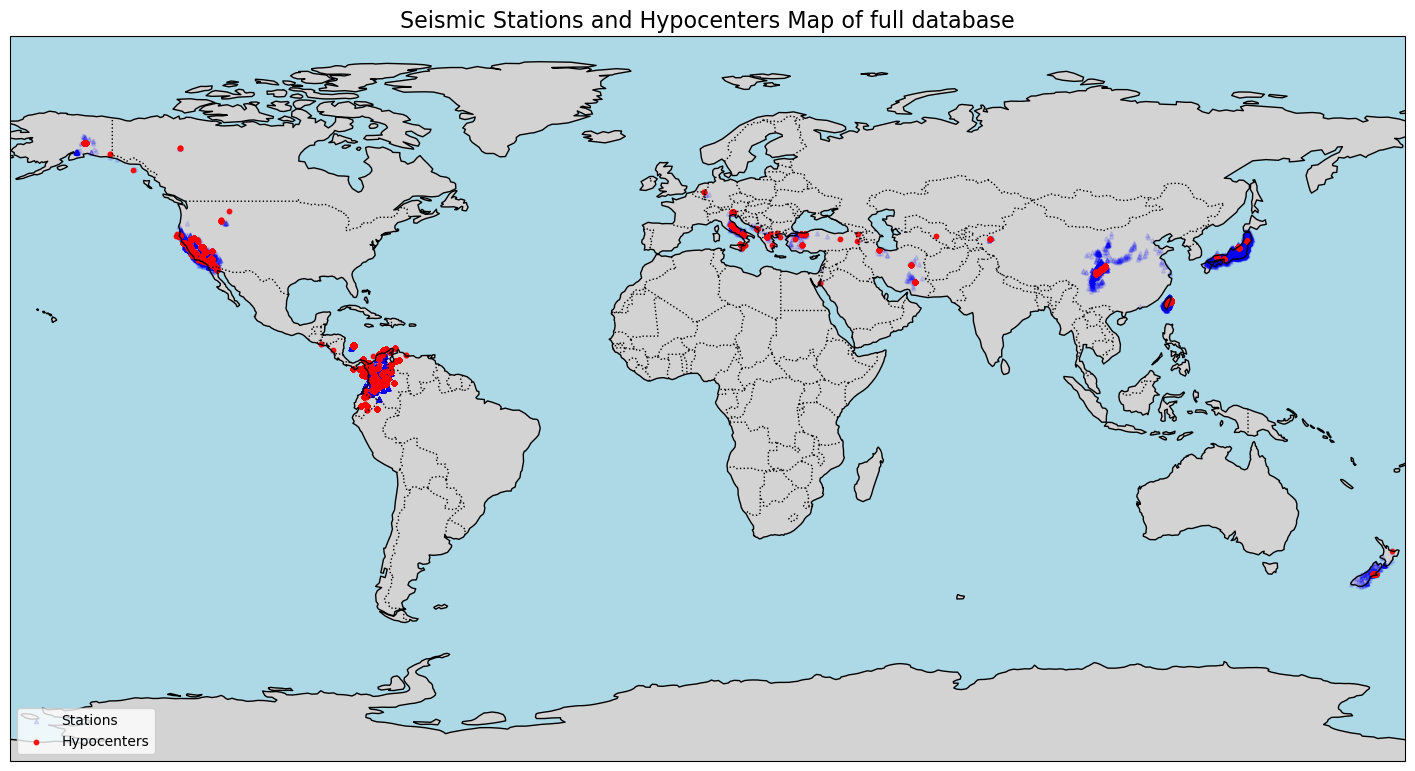

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(18,12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Límites opcionales: norte de Suramérica
# ax.set_extent([-85, -65, -5, 15])  
#ax.set_extent([-50, -50,50, 50])
# Agregar elementos del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Estaciones (ej. en azul)
plt.scatter(df_total["Station Longitude"], df_total["Station Latitude"], 
            c="blue", s=10, marker="^",  alpha=0.1,
            label="Stations", transform=ccrs.PlateCarree())

# Hipocentros (ej. en rojo)
plt.scatter(df_total["Seismic Longitude"], df_total["Seismic Latitude"], 
            c="red", s=10, marker="o", alpha=0.9,
            label="Hypocenters", transform=ccrs.PlateCarree())

# Título y leyenda
plt.title("Seismic Stations and Hypocenters Map of full database", fontsize=16)
plt.legend(loc="lower left")

plt.show()

In [40]:
df_total.drop(columns=['Seismic Latitude', 'Seismic Longitude', 'Station Latitude','Station Longitude'], inplace=True)

In [41]:
inputs = df_total.columns[0:5].append(df.columns[[31]])

In [42]:
inputs

Index(['Hypocenter Depth (km)', 'Magnitude', 'Rhypo_OpenQuake',
       'Rrup_OpenQuake', 'Soil_Class', 'origen'],
      dtype='object')

In [43]:
df_total.describe().T

count        mean         std           min  \
Hypocenter Depth (km)  17518.0   10.937106    6.965842  2.000000e-02   
Magnitude              17518.0    5.332242    1.179824  3.200000e+00   
Rhypo_OpenQuake        17518.0  255.209081  310.183244  2.060000e+00   
Rrup_OpenQuake         17518.0  246.202494  307.877064  5.000000e-02   
Soil_Class             17518.0    2.960726    0.867186  1.000000e+00   
T_0.01_RotD50          17518.0    0.032556    0.086535  3.667953e-07   
T_0.02_RotD50          17518.0    0.033239    0.089840  3.656215e-07   
T_0.03_RotD50          17518.0    0.035031    0.097706  3.665763e-07   
T_0.04_RotD50          17518.0    0.037643    0.106890  3.686024e-07   
T_0.05_RotD50          17518.0    0.040928    0.115779  3.717809e-07   
T_0.075_RotD50         17518.0    0.051362    0.146175  3.766346e-07   
T_0.1_RotD50           17517.0    0.060334    0.167047  3.959980e-07   
T_0.15_RotD50          17513.0    0.070405    0.192625  4.496561e-07   
T_0.2_RotD50           17509.0    0.072776    0.196583  6.468004e-07   
T_0.25_RotD50          17507.0    0.071116    0.193009  6.532471e-07   
T_0.3_RotD50           17503.0    0.068978    0.188090  6.547189e-07   
T_0.4_RotD50           17499.0    0.061804    0.169628  6.748307e-07   
T_0.5_RotD50           17485.0    0.055013    0.152823  7.255787e-07   
T_0.75_RotD50          17464.0    0.042251    0.124382  6.769173e-07   
T_1.0_RotD50           17375.0    0.032423    0.095053  5.662867e-07   
T_1.5_RotD50           17154.0    0.020973    0.061415  2.865295e-07   
T_2.0_RotD50           16506.0    0.015448    0.046704  1.458209e-07   
T_3.0_RotD50           15229.0    0.010109    0.031213  1.346649e-07   
T_4.0_RotD50           13339.0    0.007701    0.022088  1.355982e-07   
T_5.0_RotD50           11834.0    0.006475    0.018741  1.077202e-07   
T_6.0_RotD50           10952.0    0.005625    0.015823  8.388087e-08   
T_10.0_RotD50           9128.0    0.002444    0.006956  2.038235e-08   

                             25%         50%         75%          max  
Hypocenter Depth (km)   7.213000   10.000000   13.100000    58.700000  
Magnitude               4.300000    5.106300    6.300000     7.900000  
Rhypo_OpenQuake        61.952950  135.568624  287.376771  1754.710000  
Rrup_OpenQuake         55.592500  125.944481  277.000434  1719.484836  
Soil_Class              2.000000    3.000000    3.000000     5.000000  
T_0.01_RotD50           0.000222    0.002911    0.023384     1.793158  
T_0.02_RotD50           0.000254    0.003010    0.023473     1.838349  
T_0.03_RotD50           0.000263    0.003108    0.024302     2.173418  
T_0.04_RotD50           0.000271    0.003274    0.025276     2.444077  
T_0.05_RotD50           0.000284    0.003574    0.026838     2.545878  
T_0.075_RotD50          0.000323    0.004322    0.033223     2.918479  
T_0.1_RotD50            0.000337    0.005059    0.039365     4.619663  
T_0.15_RotD50           0.000365    0.005828    0.047943     3.770822  
T_0.2_RotD50            0.000391    0.006226    0.050548     4.325432  
T_0.25_RotD50           0.000393    0.006075    0.050470     4.202180  
T_0.3_RotD50            0.000359    0.005513    0.049528     4.814835  
T_0.4_RotD50            0.000299    0.004552    0.043362     3.347242  
T_0.5_RotD50            0.000245    0.003636    0.037724     3.287620  
T_0.75_RotD50           0.000145    0.002313    0.028222     3.388009  
T_1.0_RotD50            0.000096    0.001588    0.021931     2.096978  
T_1.5_RotD50            0.000048    0.000789    0.014234     1.174380  
T_2.0_RotD50            0.000030    0.000566    0.010489     1.126811  
T_3.0_RotD50            0.000014    0.000347    0.006517     1.063239  
T_4.0_RotD50            0.000008    0.000321    0.005311     0.386233  
T_5.0_RotD50            0.000004    0.000289    0.004697     0.343812  
T_6.0_RotD50            0.000003    0.000297    0.004485     0.332038  
T_10.0_RotD50           0.000001    0.000182    0.001864     0.2

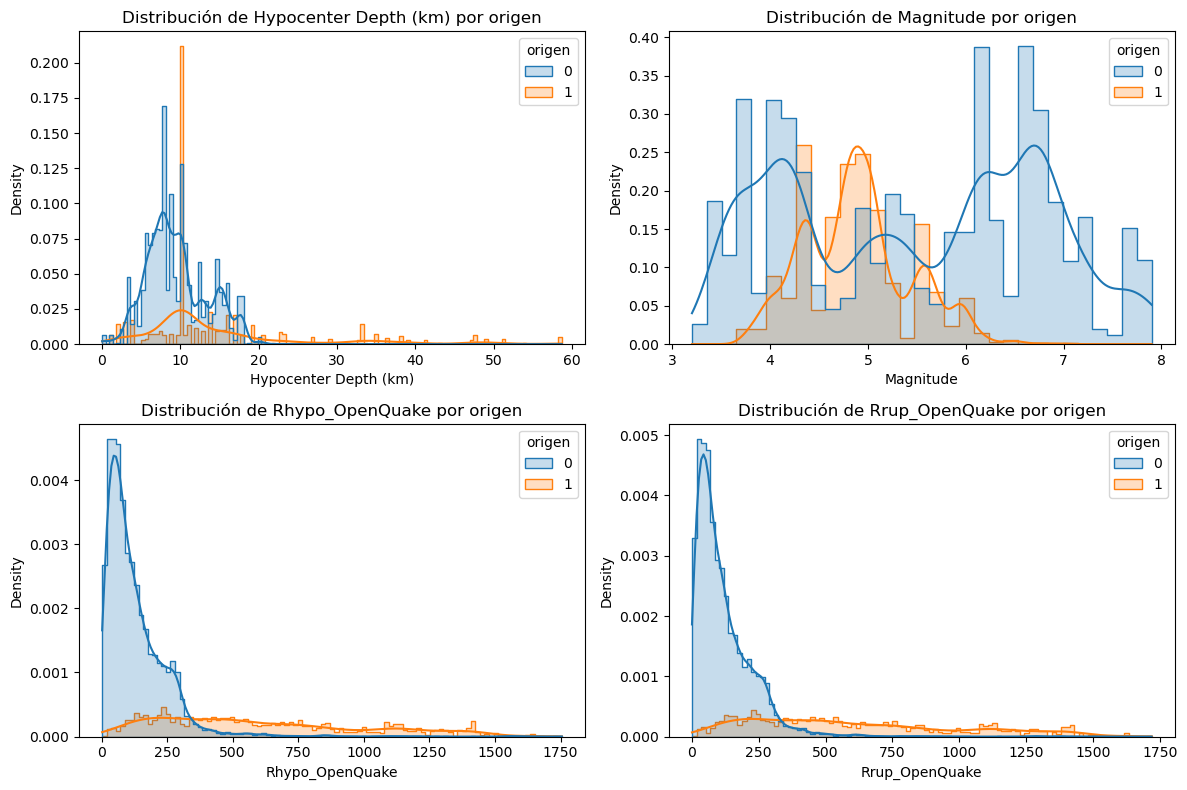

In [44]:
variables = ['Hypocenter Depth (km)', 'Magnitude', 'Rhypo_OpenQuake', 'Rrup_OpenQuake']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas
axes = axes.flatten()  # pasar a arreglo 1D para iterar fácil

for i, var in enumerate(variables):
    sns.histplot(data=df_total, x=var, hue="origen", kde=True,
                 element="step", stat="density", ax=axes[i])
    axes[i].set_title(f"Distribución de {var} por origen")

plt.tight_layout()
plt.show()


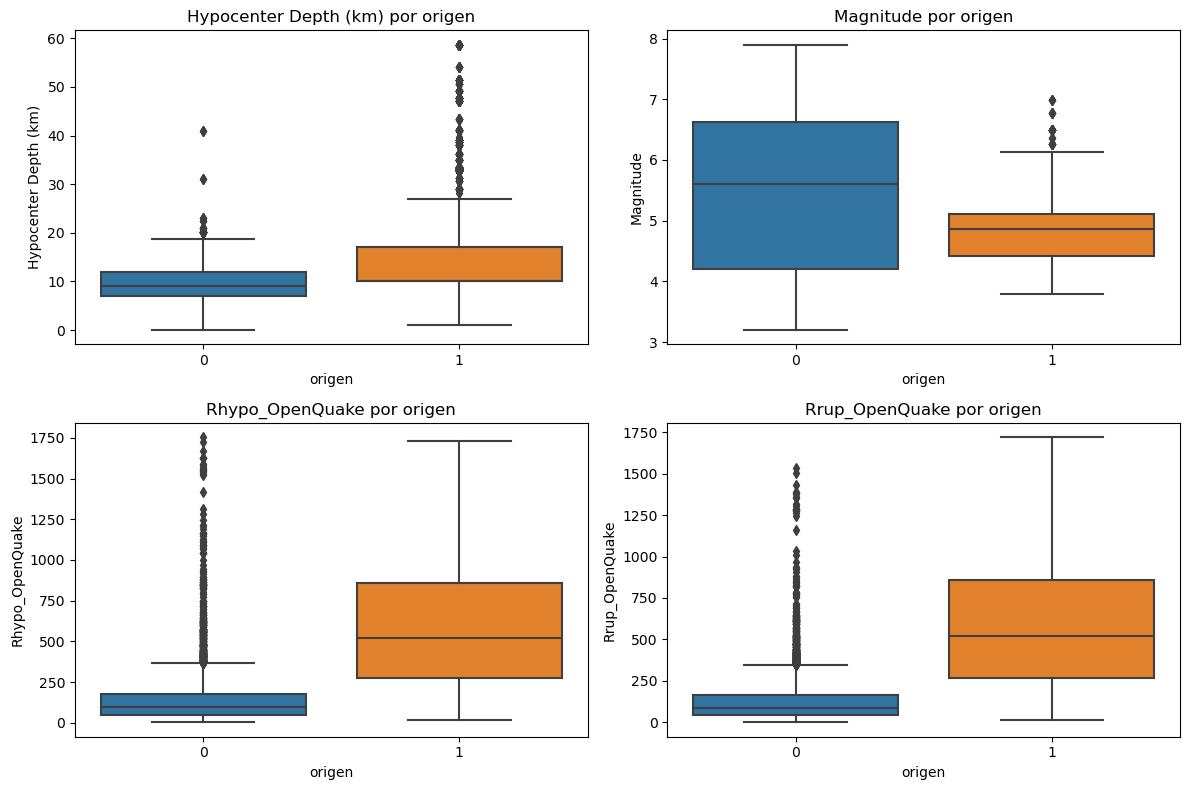

In [45]:
variables = ['Hypocenter Depth (km)', 'Magnitude', 'Rhypo_OpenQuake', 'Rrup_OpenQuake']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=df_total, x="origen", y=var, ax=axes[i])
    axes[i].set_title(f"{var} por origen")

plt.tight_layout()
plt.show()


origen  Soil_Class
0       1                6
        2             2477
        3             7770
        4             2245
        5              401
1       1              838
        2             1153
        3             1426
        4              821
        5              381
dtype: int64


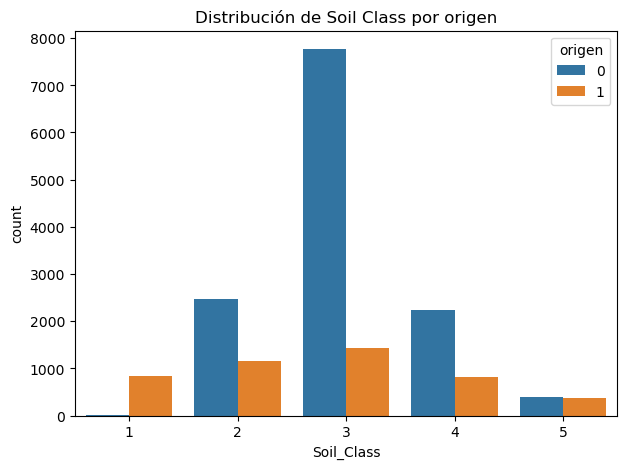

In [46]:
# Conteo absoluto
print(df_total.groupby(['origen', 'Soil_Class']).size())

# Gráfico
plt.figure(figsize=(7,5))
sns.countplot(data=df_total, x='Soil_Class', hue='origen')
plt.title("Distribución de Soil Class por origen")
plt.show()

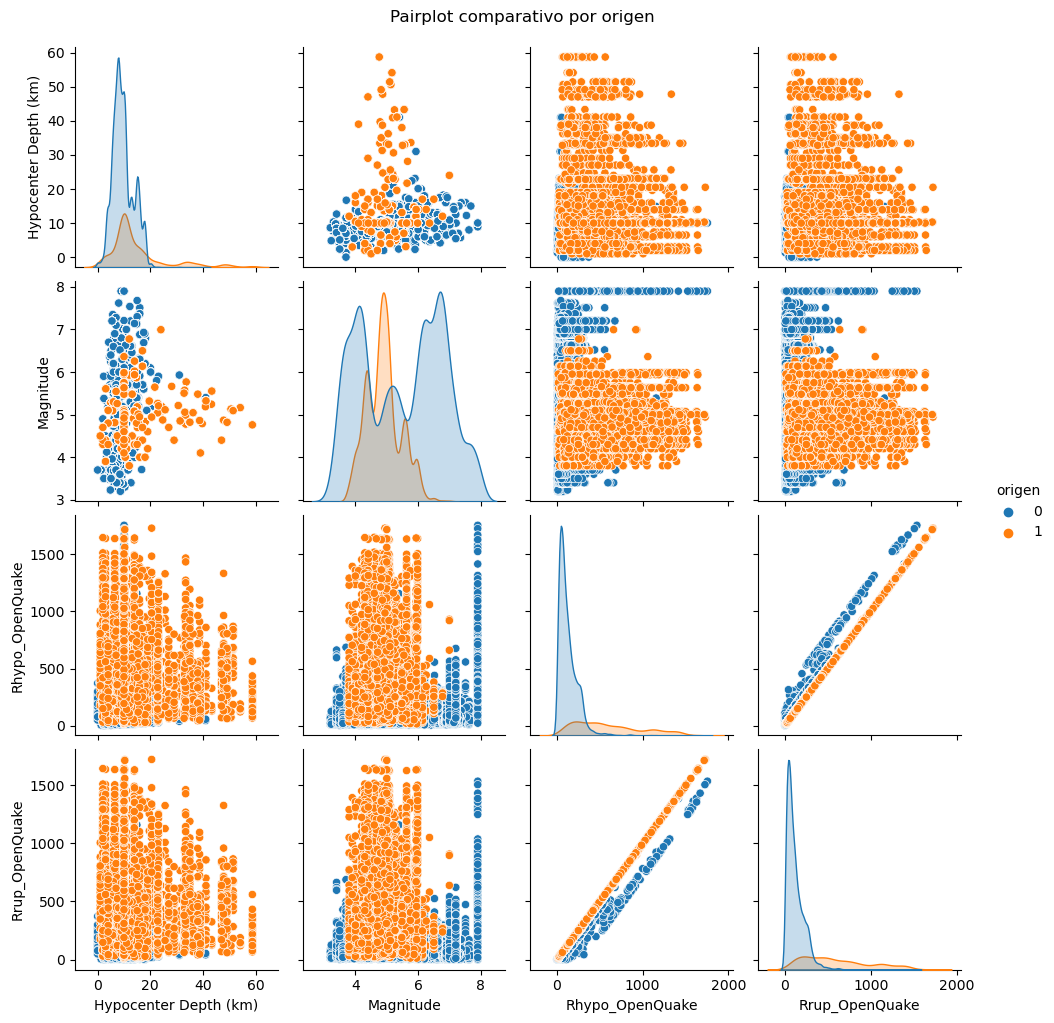

In [47]:
sns.pairplot(df_total, vars=variables, hue="origen", diag_kind="kde")
plt.suptitle("Pairplot comparativo por origen", y=1.02)
plt.show()


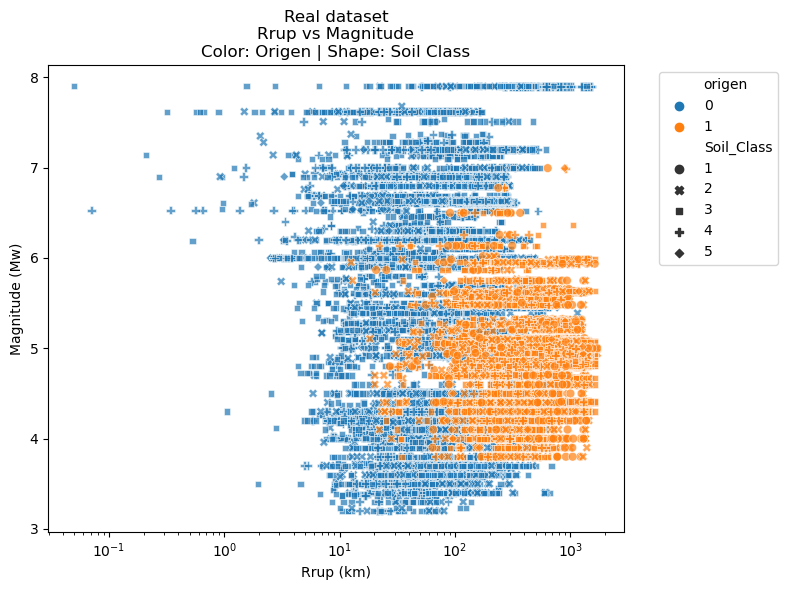

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_total,
    x="Rrup_OpenQuake", 
    y="Magnitude",
    hue="origen",          # Color según origen
    style="Soil_Class",    # Marcador según tipo de suelo
    alpha=0.7,             # Transparencia para ver densidad
    s=40                  # Tamaño de puntos
)

plt.xscale("log")  # Escala logarítmica en X
plt.title("Real dataset\nRrup vs Magnitude\nColor: Origen | Shape: Soil Class")
plt.xlabel("Rrup (km)")
plt.ylabel("Magnitude (Mw)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover leyenda afuera
plt.tight_layout()
plt.show()


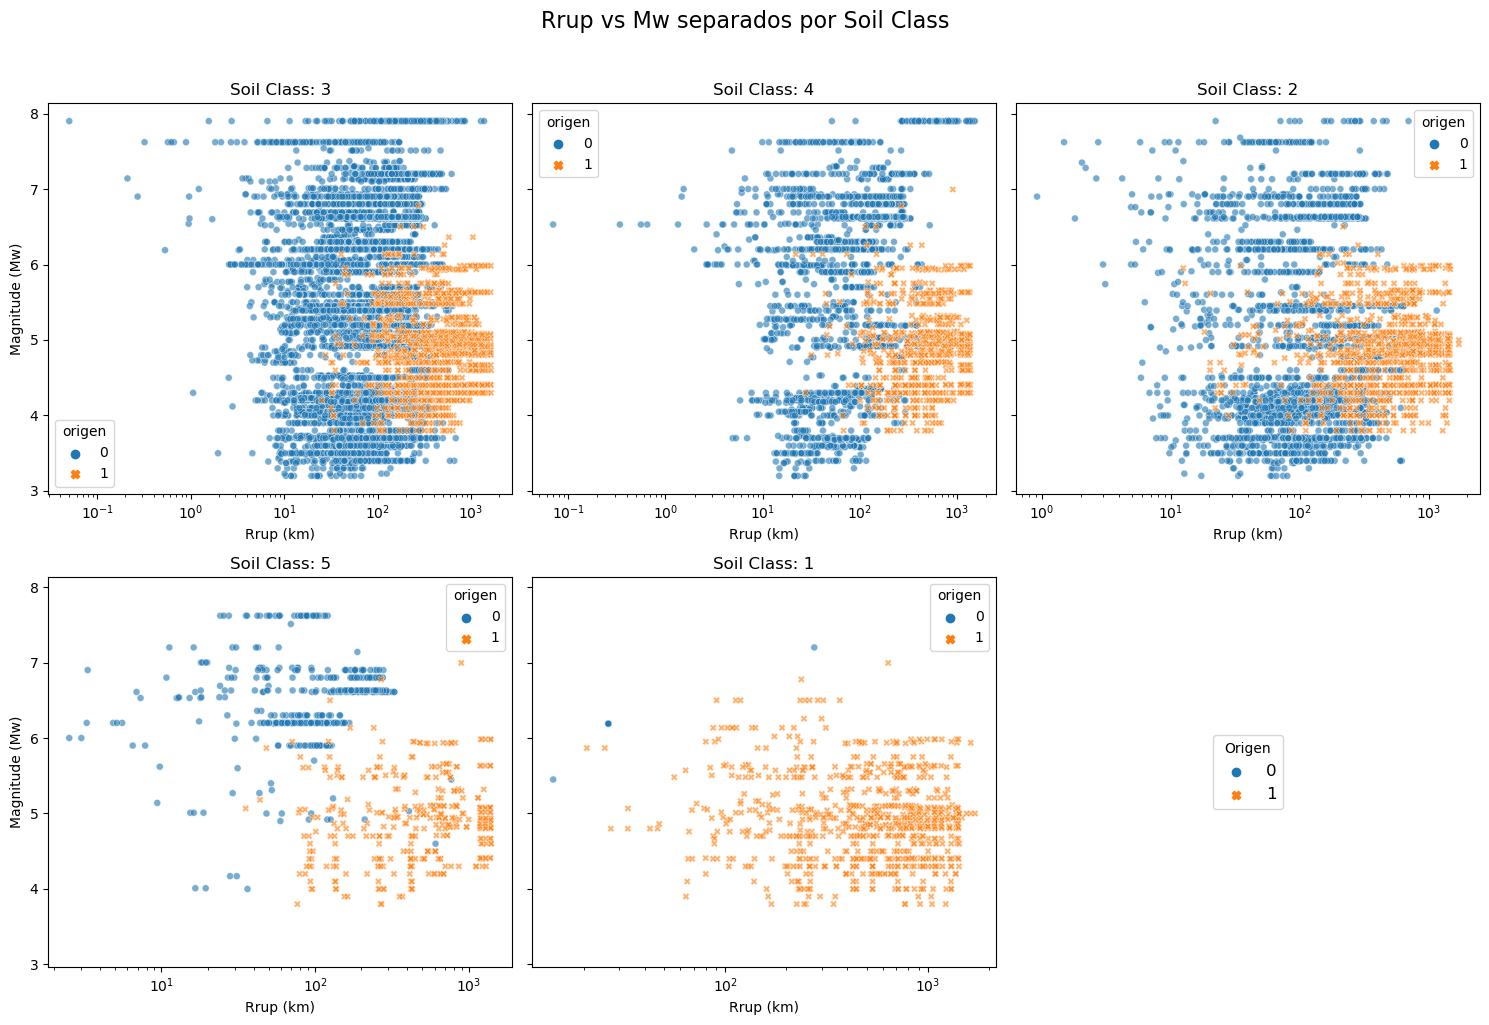

In [49]:
soil_classes = df_total['Soil_Class'].unique()[:5]  # tomar 5 tipos de suelo
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, soil in enumerate(soil_classes):
    subset = df_total[df_total['Soil_Class'] == soil]
    sns.scatterplot(
        data=subset,
        x="Rrup_OpenQuake", 
        y="Magnitude",
        hue="origen",      
        style="origen",    
        alpha=0.6,
        s=25,
        ax=axes[i]
    )
    axes[i].set_xscale("log")
    axes[i].set_title(f"Soil Class: {soil}")
    axes[i].set_xlabel("Rrup (km)")
    if i % 3 == 0:  # primera columna de cada fila muestra Y label
        axes[i].set_ylabel("Magnitude (Mw)")
    else:
        axes[i].set_ylabel("")

# Usar el subplot 6 para la leyenda
axes[-1].axis("off")  # lo apagamos
handles, labels = axes[0].get_legend_handles_labels()
axes[-1].legend(handles, labels, loc="center", fontsize=12, title="Origen")

plt.suptitle("Rrup vs Mw separados por Soil Class", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


### Logarithm transformation to Rrup and Rhypo variables.

In [50]:
df_total['Rhypo_OpenQuake'] = np.log(df_total['Rhypo_OpenQuake'])  # +1 para evitar log(0)
df_total['Rrup_OpenQuake'] = np.log(df_total['Rrup_OpenQuake'])  

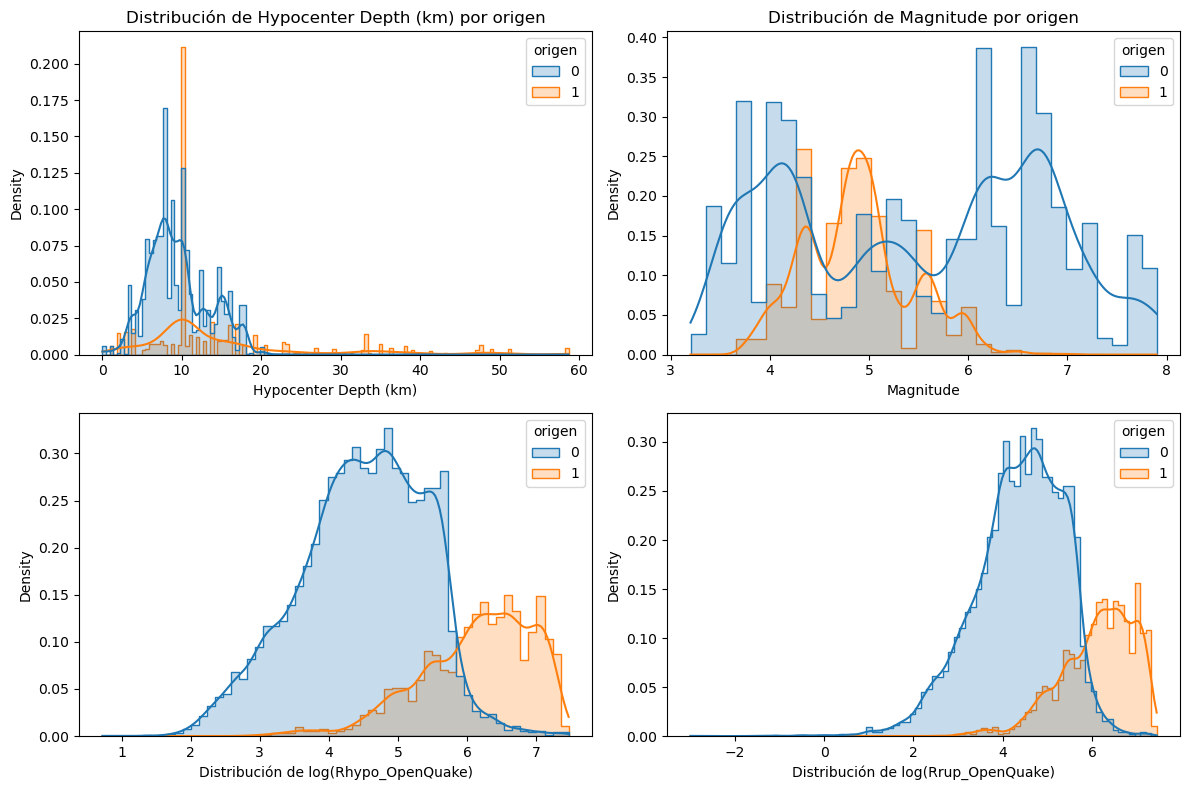

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas x 2 columnas
axes = axes.flatten()  # pasar a arreglo 1D para iterar fácil

for i, var in enumerate(variables):
    sns.histplot(data=df_total, x=var, hue="origen", kde=True,
                 element="step", stat="density", ax=axes[i])
    if var in ['Rhypo_OpenQuake', 'Rrup_OpenQuake']:
        axes[i].set_xlabel(f"Distribución de log({var})")
    else:
        axes[i].set_title(f"Distribución de {var} por origen")

plt.tight_layout()
plt.show()


## .Hola.